Name: **Rashi Rajesh Shetty**

UID: **2309045**

Roll no.: **36**

MSc BDA **Part I**

***Assignment Work in Machine Learning***

# **Car Price Prediction Model**

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [385]:
df = pd.read_csv("C:\\Users\\rashi\\Downloads\\CarsData.csv")

In [241]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


Using data from online listings of used cars, I aim to develop a price prediction model to assist sellers in setting competitive prices and buyers in making informed purchasing decisions, enhancing efficiency in the online car marketplace.

*Real-life application of a price prediction model* for used cars could be online car marketplaces such as Cars.com, or Craigslist.

When a user is interested in selling their used car. They input details about their vehicle, such as the make, model, mileage, and any additional features. The business's price prediction model analyzes these inputs along with historical sales data and market trends to generate an estimated selling price for the user's car.

The estimated price serves as a reference point for the seller, helping them set a competitive and realistic listing price. This benefits both the seller, by maximizing their chances of selling the car quickly and at a fair price, and the buyer, by providing transparent pricing information.

Similarly, buyers browsing the business's platform can use the estimated prices as guidance when comparing different listings and negotiating with sellers. This streamlines the buying process and enhances trust between buyers and sellers.

**Flow Chart of the Model Building Process**

Exploratory Data Analysis (EDA)

Preprocessing of Columns

Feature Engineering

Model Fitting

Evaluation Metrics

Final Model Selection

Model Finetuning

Result Analysis

# **Exploratory Data Analysis (EDA)**

In [381]:
df.shape

(97712, 16)

The dataset comprises of *97,712 records with 16 features*. This large & rich dataset allows for a comprehensive data exploration between the predictors and the target variable, enabling robust model training and evaluation.

In [386]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Uniques'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values

    display(summ)

summary(df)

,Data Type,Missing#,Uniques,Min,Max,Average,Standard Deviation
model,object,0,196,NaN,NaN,NaN,NaN
year,int64,0,27,1970.0,2024.0,2017.066502,2.118661
price,int64,0,13236,450.0,159999.0,16773.487555,9868.552222
transmission,object,0,4,NaN,NaN,NaN,NaN
mileage,int64,0,42214,1.0,323000.0,23219.475499,21060.882301
fuelType,object,0,5,NaN,NaN,NaN,NaN
tax,int64,0,48,0.0,580.0,120.142408,63.35725
mpg,float64,0,208,0.3,470.8,55.205623,16.181659
engineSize,float64,0,40,0.0,6.6,1.664913,0.558574
Manufacturer,object,0,9,NaN,NaN,NaN,NaN


There are no missing values and the dataset covers cars manufactured over a span of 27 years (from 1970 to 2024).
The target variable (price) has considerable variability indicating that the dataset includes cars that are budget friendly as well as luxury / premium cars.


Overall, the summary statistics suggest that the dataset features exhibit a wide range of values and variability, reflecting the diversity of car models and characteristics included in the dataset. 

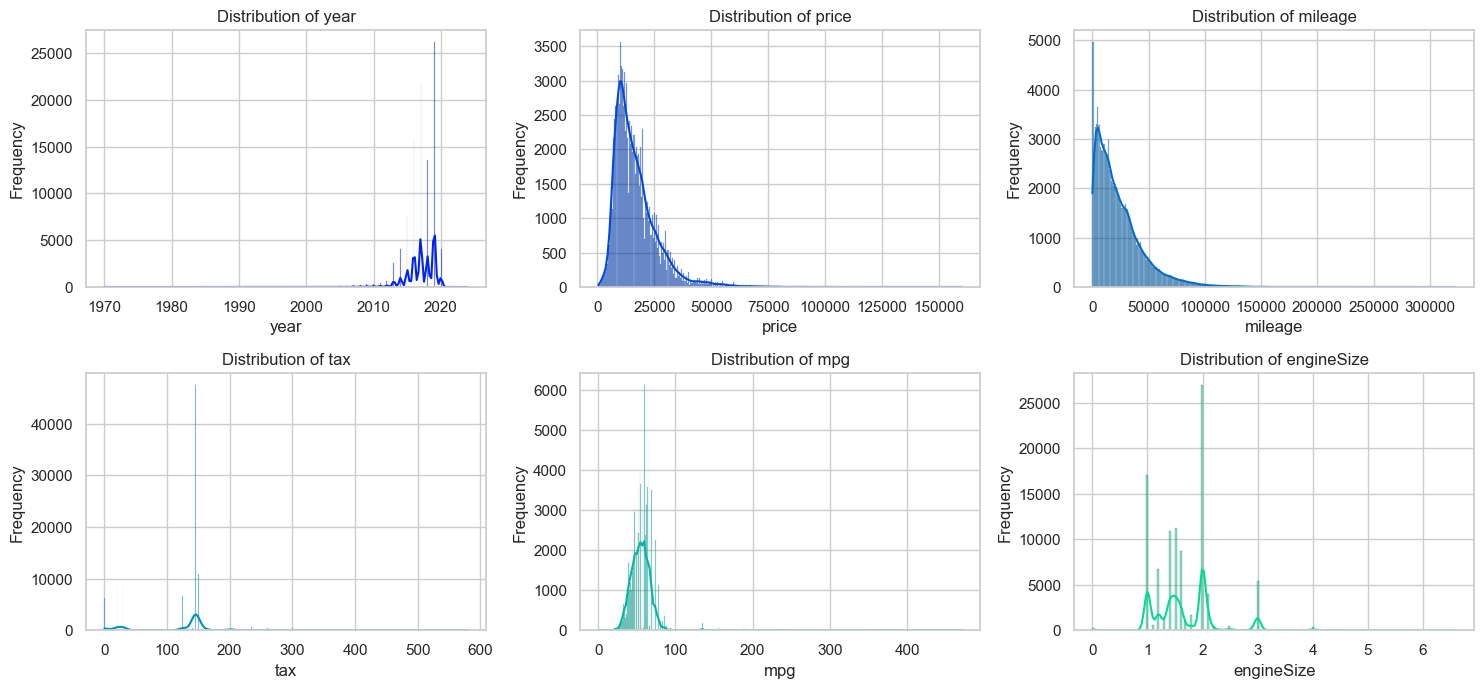

In [243]:
num_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
colors = sns.color_palette('winter', n_colors=len(num_cols))  #defining the color palette
plt.figure(figsize=(15, 10))

for i, (num_col, color) in enumerate(zip(num_cols, colors)):  #this will create a histogram for each column
    plt.subplot(3, 3, i+1)
    sns.histplot(df[num_col], kde=True, color=color, edgecolor='black')
    plt.title("Distribution of " + num_col)
    plt.xlabel(num_col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Overall, the data suggests that most cars are relatively inexpensive, have low to moderate mileage, and are fuel-efficient with mid-range engine sizes.

<Axes: >

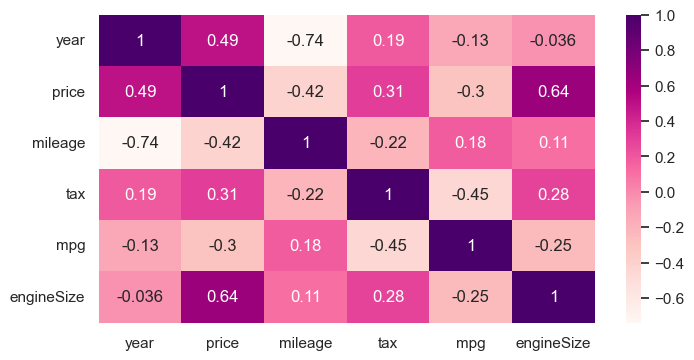

In [244]:
corr = df[num_cols].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='RdPu', annot=True)

**Positive correlation:** Price and engine size: Cars with larger engines tend to be more expensive.

**Negative correlation:** 
Year and mileage: Newer cars tend to have lower mileage. || MPG and engine size: Cars with better gas mileage tend to have smaller engines.

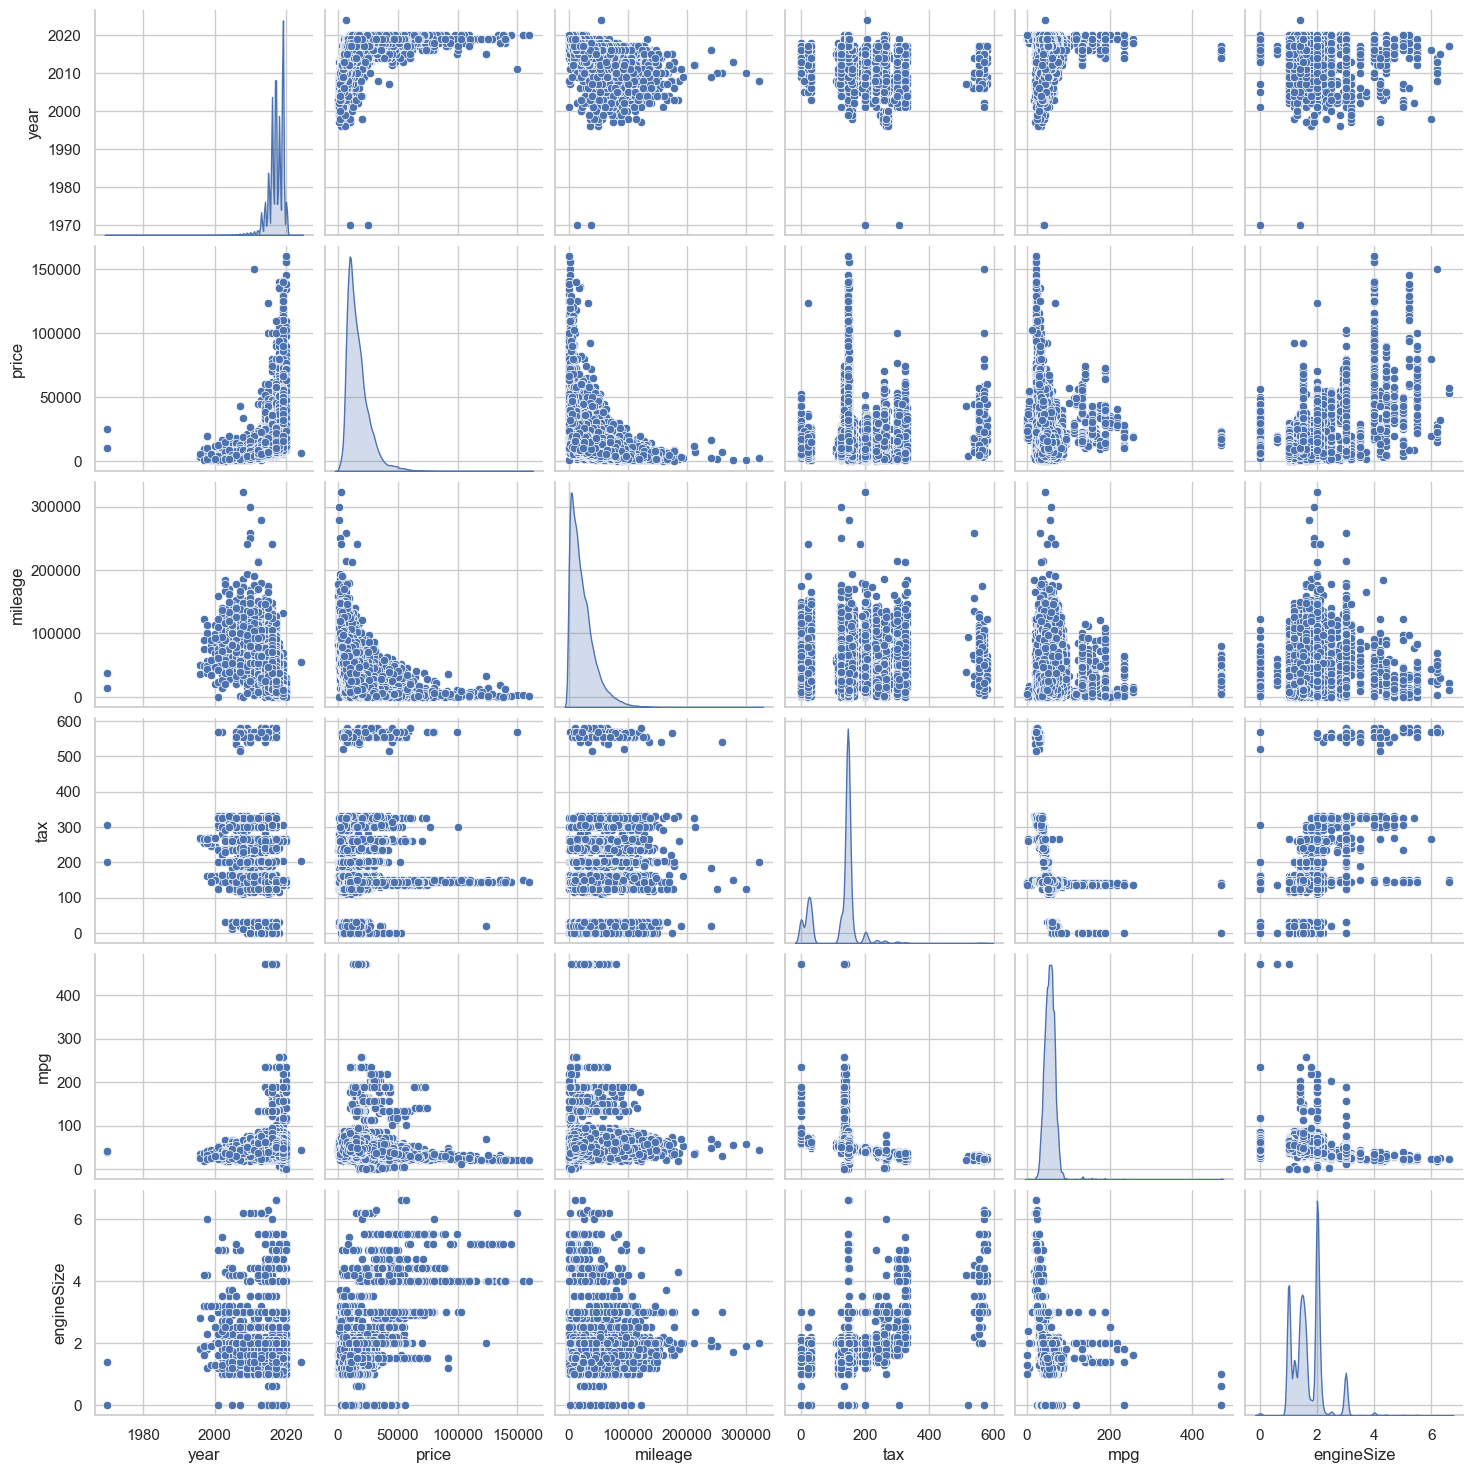

In [245]:
sns.pairplot(df[num_cols], diag_kind='kde') #Kernel Density Estimation; estimate the probability density function of a continuous r.v
plt.show()

Here, we can take a closer look at the relationships at work between the features and the overall distribution of data.
The mileage & price plot showcase that cars with higher mileage are priced lower & the expensive cars have a lower mileage. This indicates that luxury & premium cars have a lower mileage. 

This derivation is accurate when compared with domain knowledge that luxury one-of-a-kind cars are usually considered as collectibles and are not driven around for regular use; hence the lower mileage. 

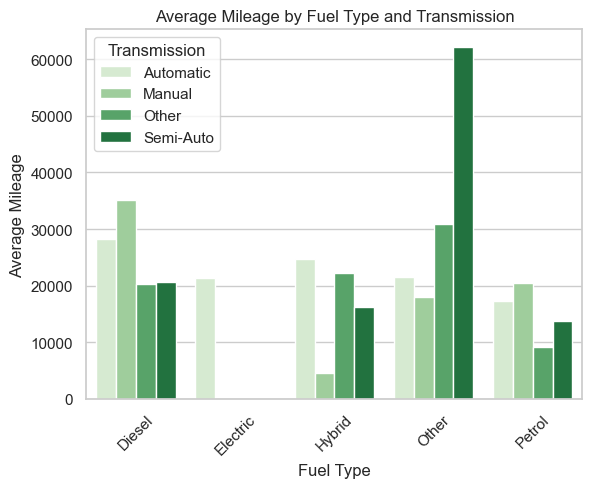

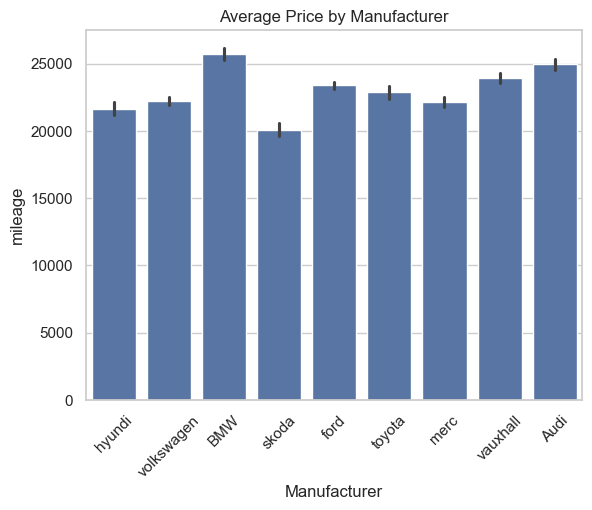

In [387]:
df_grouped = df.groupby(['fuelType', 'transmission'])['mileage'].mean().reset_index()

sns.barplot(x='fuelType', y='mileage', hue='transmission', data=df_grouped, palette='Greens')
plt.title('Average Mileage by Fuel Type and Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage')
plt.legend(title='Transmission')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='Manufacturer', y='mileage', data=df)  #helps us categorie luxury cars
plt.title('Average Price by Manufacturer')
plt.xticks(rotation=45)
plt.show()

Automatic transmissions appear to get lower gas mileage than manual transmissions across all fuel types.
Diesel vehicles get the highest mileage overall, followed by hybrids, electric vehicles, and then petrol vehicles.
Other transmissions, which likely include not popularly known transmission types or could also be missing values in disguise, appear to be similar to automatics in terms of fuel efficiency.

Similarly, the "Other" attribute in FuelType could either indicate fuel alternatives like CNG or could more likely indicate missing values.

Mercedes-Benz has the highest average price. Audi follows closely behind and BMW is in third place. There is a significant gap between these three manufacturers and the rest. Ford has the lowest average price out of the manufacturers.

This gives us a look into which cars will be luxury cars and which would be categorized as budget friendly cars aka lower prices.

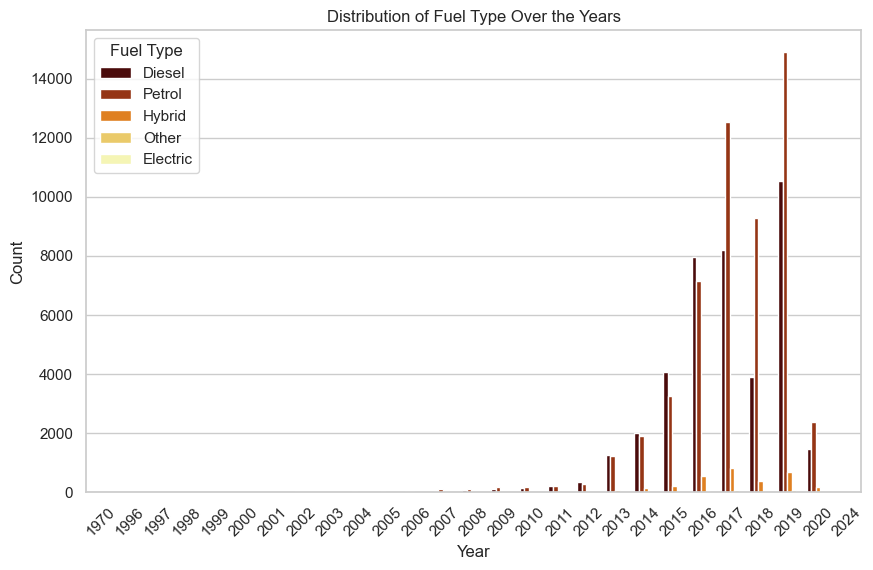

In [398]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='fuelType', data=df, palette='afmhot')
plt.title('Distribution of Fuel Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.show()

*Preference for Petrol Cars:* Petrol cars (gasoline) cars appear to be the most common fuel type throughout the years shown in the graph, with a steady increase in count over time. The steady increase in petrol car count over time could be attributed to continued demand for petrol-powered vehicles driven by consumer preferences, infrastructure support, and advancements in petrol engine technology improving efficiency and performance.


*Regulatory Changes and Emission Concerns for Diesel Cars:* Diesel appear to be the second most common fuel type, but their count appears to be flat or even slightly decreasing over time with an extreme dip in 2018. The decline in the count of diesel cars and the dip in 2018 could be influenced by regulatory changes and increasing environmental concerns regarding diesel emissions. Diesel engines have faced scrutiny for their higher emissions of pollutants.


*Rise of Hybrid Cars and Environmental Awareness:* Hybrid cars appear to be the least common fuel type, but their count is definitively increasing over time. The increasing count of hybrid cars reflects growing consumer interest in fuel-efficient and environmentally friendly vehicles. 

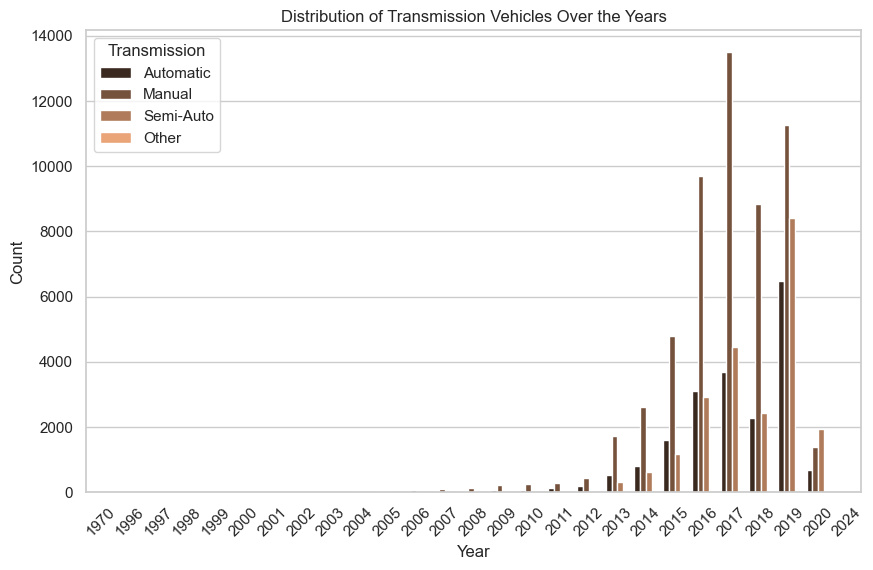

In [399]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='transmission', data=df, palette='copper')
plt.title('Distribution of Transmission Vehicles Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Transmission')
plt.xticks(rotation=45)
plt.show()

*Spike in Automatic Transmission Vehicles in 2019:* The spike in automatic transmission vehicles in 2019 could be influenced by the increasing consumer preference for automatic transmissions due to their convenience, ease of use, and smoother driving experience, particularly in urban areas with heavy traffic. 

However, manual cars remain the most dominant type of transmission throughout all years

# **YEAR**

In [403]:
df['year'].value_counts().sort_index()

year
1970        2
1996        2
1997        4
1998        8
1999        6
2000        9
2001       20
2002       31
2003       34
2004       52
2005       69
2006       86
2007      163
2008      199
2009      277
2010      340
2011      432
2012      633
2013     2590
2014     4053
2015     7586
2016    15724
2017    21616
2018    13570
2019    26165
2020     4040
2024        1
Name: count, dtype: int64

The data distribution through out the years is uneven and skewed. Here, I have made the decision to categorize the data into bins. Each bin will represent a decade in car manufacturing.
The reson for such a pre processing technique is;

*Reduced Complexity:* makes the plot less cluttered and easier to interpret, especially when dealing with a large number of data points (90K).

*Smoothed Trend Representation:* smooths out fluctuations and noise, focusing on the broader trend over time rather than getting distracted by small variations within individual years.

Here, I have created bins such as "1970s", "1980s", "1990s", "2000s", "2010s", and "2020s" to represent decades. This reduces the granularity of the data and may help capture broader trends without overfitting.

The price of cars tends to increase over time due to factors such as inflation, technological advancements, and changes in consumer preferences, it's important to preserve this ordinal relationship between the manufacturing years when preprocessing. Hence, binning followed by one-hot encoding may not be the most suitable approach because it treats all bins as independent categories without considering their ordinality.

In [404]:
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]  #Bin labels must be one fewer than the number of bin edges
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['decade'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
df.drop('year', axis=1, inplace=True)
df['year'] = df['decade'].cat.codes
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,year
0,I10,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,2010s,5
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,2010s,5
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,2010s,5
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,2010s,5
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.2,ford,2010s,5


Instead, I have encoded the "year" column using ordinal encoding, which assigns a unique integer value to each year based on its ordinal position in the sequence. This preserves the ordinal relationship between the years while still allowing the model to learn from the data.

Given the assumption that the decades have an inherent order (i.e., 2020s > 2010s > 2000s > 1990s).

In [405]:
df['year'].value_counts().sort_index()

year
1        2
3       20
4      940
5    92709
6     4041
Name: count, dtype: int64

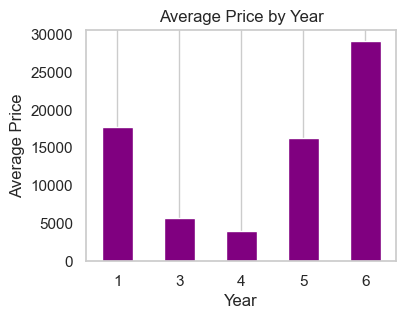

In [406]:
average_price_per_year = df.groupby('year')['price'].mean()

plt.figure(figsize=(4, 3))
average_price_per_year.plot(kind='bar', color='purple')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Additional factors may influence car prices, such as model popularity, market demand, geographical location, and economic conditions. These factors can provide context for understanding the observed price variations.

C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\1716774558.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['decade', 'Manufacturer'])


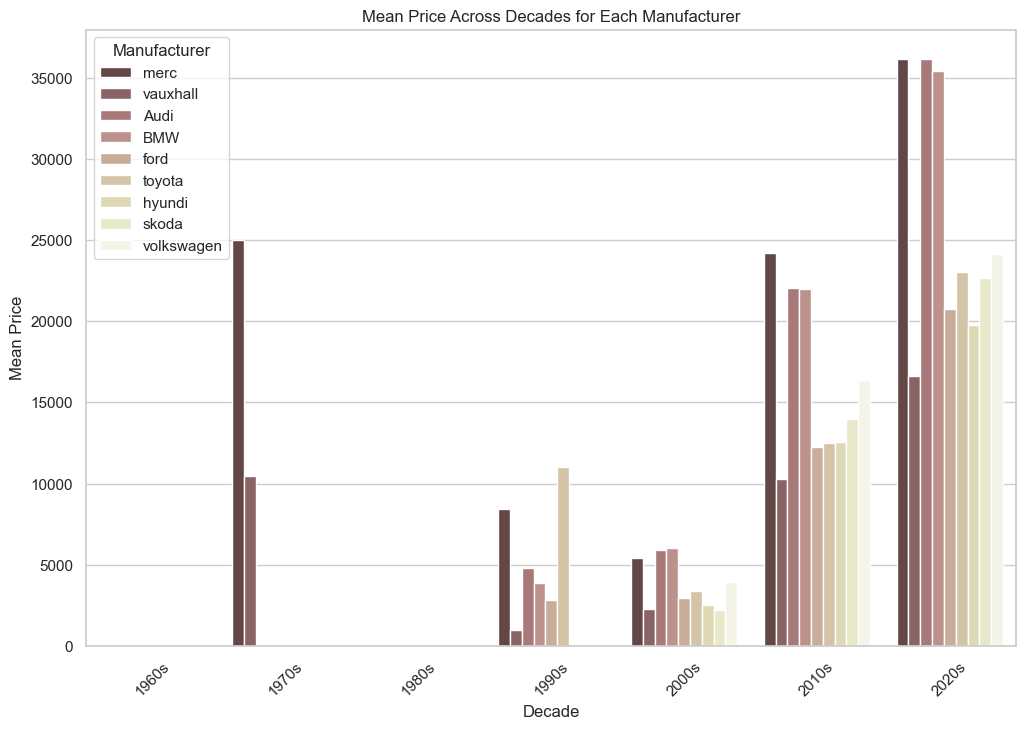

In [407]:
grouped_data = df.groupby(['decade', 'Manufacturer'])
summary_statistics = grouped_data['price'].describe()

plt.figure(figsize=(12, 8))
sns.barplot(x='decade', y='mean', hue='Manufacturer', data=summary_statistics, palette='pink')
plt.title('Mean Price Across Decades for Each Manufacturer')
plt.xlabel('Decade')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Manufacturer')
plt.show()

In [411]:
def detect_outliers(group):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (group['price'] < lower_bound) | (group['price'] > upper_bound)
    return outliers

outliers = grouped_data.apply(detect_outliers)
outlier_counts = outliers.groupby(['decade', 'Manufacturer']).sum()

consistent_outliers = outlier_counts[outlier_counts > 0].dropna().reset_index() #count of outliers for each combination of decade and manufacturer
decade_mapping = {
    '1990s': 1990,
    '2000s': 2000,
    '2010s': 2010,
    '2020s': 2020
}

consistent_outliers['decade_numeric'] = consistent_outliers['decade'].map(decade_mapping)
consistent_outliers = pd.merge(consistent_outliers, df[['Manufacturer', 'fuelType']], on='Manufacturer', how='left')
consistent_outliers.head()
#identifies consistent outliers, maps decade categories to numerical values, and adds a new column to store the numerical representation of decades

C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\1759305299.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = grouped_data.apply(detect_outliers)
C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\1759305299.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outlier_counts = outliers.groupby(['decade', 'Manufacturer']).sum()


,decade,Manufacturer,price,decade_numeric,fuelType
0,1990s,BMW,2,1990.0,Diesel
1,1990s,BMW,2,1990.0,Diesel
2,1990s,BMW,2,1990.0,Petrol
3,1990s,BMW,2,1990.0,Diesel
4,1990s,BMW,2,1990.0,Diesel


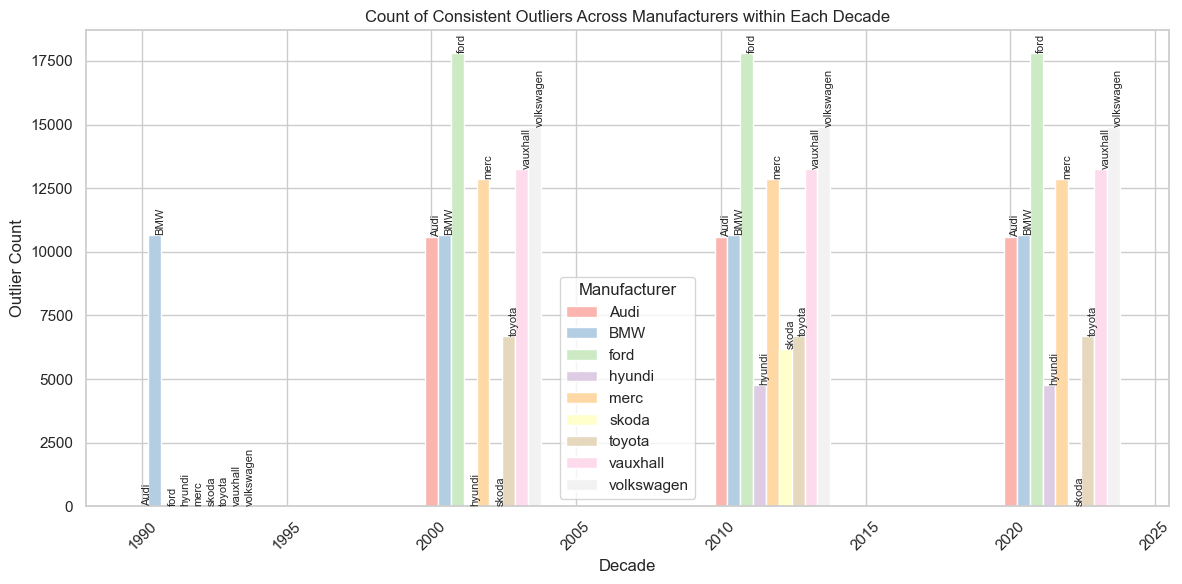

In [423]:
grouped = consistent_outliers.groupby(['Manufacturer', 'decade_numeric']).size().unstack(fill_value=0)
colors = plt.cm.Pastel1(range(len(grouped)))

fig, ax = plt.subplots(figsize=(12, 6))  
bar_width = 4 / len(grouped.index) 

for i, (manufacturer, data) in enumerate(grouped.iterrows()):
    x_positions = data.index + i * bar_width
    plt.bar(x_positions, data, width=bar_width, label=manufacturer,
            color=colors_all_fuels[i])
    for x, y in zip(x_positions, data):
        plt.text(x, y, manufacturer, rotation=90, va='bottom', fontsize=8)

ax.set_title('Count of Consistent Outliers Across Manufacturers within Each Decade')
ax.set_xlabel('Decade')
ax.set_ylabel('Outlier Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Manufacturer')
plt.tight_layout()
plt.show()

Outliers may represent unique cases or exceptional circumstances within the dataset. These values could correspond to rare events, extreme conditions, or unusual occurrences that are inherently valuable for analysis. Removing outliers without considering their context may result in the loss of important insights or patterns.

In some cases, outliers may reflect correct and valid data points within the dataset. These values could arise due to genuine variability or legitimate observations that deviate significantly from the majority of the data. Removing such outliers arbitrarily could lead to a distortion of the dataset and inaccurate conclusions.

To make sense of these outliers, I compared it to domain knowledge;

The 2000s saw a period of economic growth and increasing affluence in many regions around the world. Rising incomes, favorable economic conditions, and increased consumer confidence may have contributed to a surge in demand for luxury vehicles. As disposable incomes increased, consumers were more inclined to invest in high-end and prestigious automobile brands.

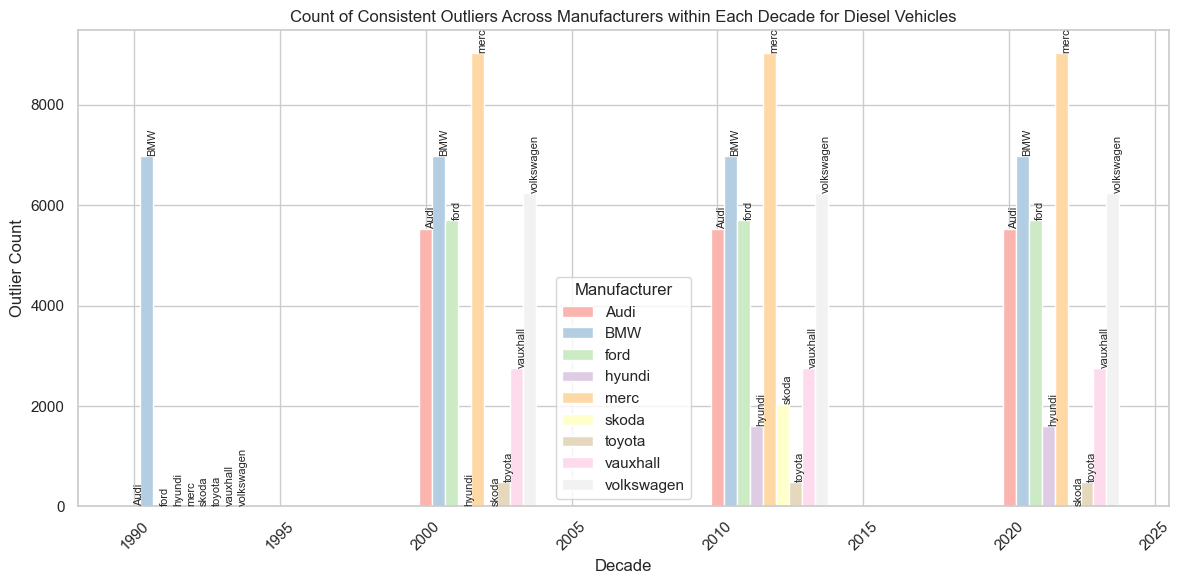

In [428]:
diesel_outliers = consistent_outliers[consistent_outliers['fuelType'] == 'Diesel']
grouped_diesel = diesel_outliers.groupby(['Manufacturer', 'decade_numeric']).size().unstack(fill_value=0)
colors_diesel = plt.cm.Pastel1(range(len(grouped_diesel)))

plt.figure(figsize=(12, 6))
bar_width = 4 / len(grouped_diesel.index) 

for i, (manufacturer, data) in enumerate(grouped_diesel.iterrows()):
    x_positions = data.index + i * bar_width
    plt.bar(x_positions, data, width=bar_width, label=manufacturer,
            color=colors_diesel[i])
    for x, y in zip(x_positions, data):
        plt.text(x, y, manufacturer, rotation=90, va='bottom', fontsize=8)

plt.title('Count of Consistent Outliers Across Manufacturers within Each Decade for Diesel Vehicles')
plt.xlabel('Decade')
plt.ylabel('Outlier Count')
plt.xticks(rotation=45)
plt.legend(title='Manufacturer')
plt.tight_layout()
plt.show()

This visualizes the distribution of "diesel" cars. Mercedes-Benz commands over 40% of luxury car market & competition like Audi exited diesel segment.
This would verify the mercedes domination in the above graph.

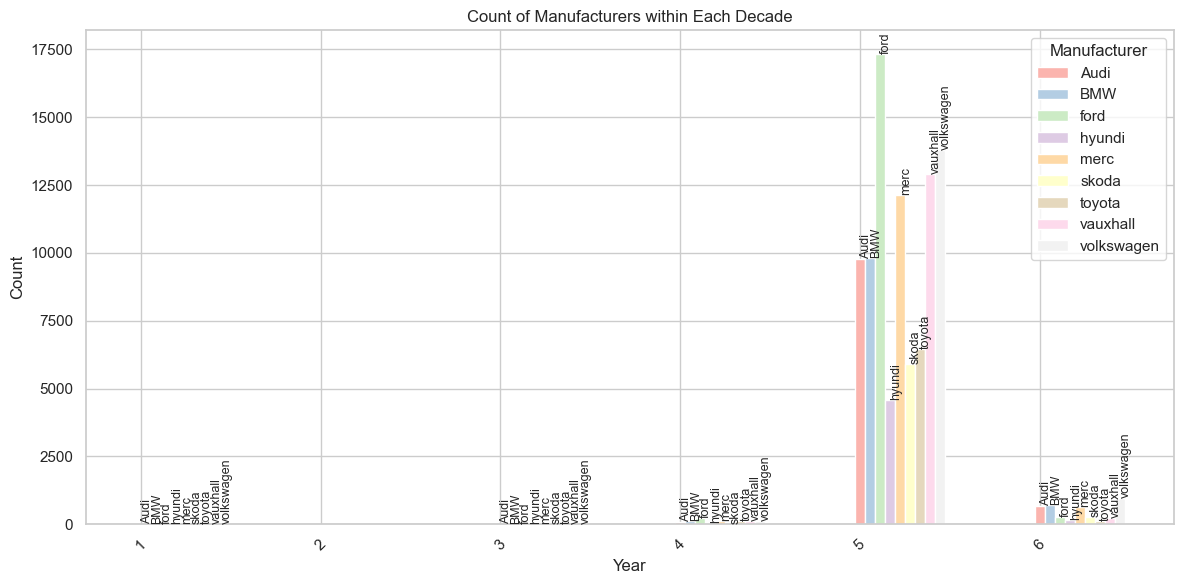

In [441]:
grouped = df.groupby(['Manufacturer', 'year']).size().unstack(fill_value=0)
colors = plt.cm.Pastel1(range(len(grouped)))

fig, ax = plt.subplots(figsize=(12, 6))  
bar_width = 0.5 / len(grouped.index) 

for i, (manufacturer, data) in enumerate(grouped.iterrows()):
    x_positions = data.index + i * bar_width
    plt.bar(x_positions, data, width=bar_width, label=manufacturer,
            color=colors_all_fuels[i])
    for x, y in zip(x_positions, data):
        plt.text(x, y, manufacturer, rotation=90, va='bottom', fontsize=9)

ax.set_title('Count of Manufacturers within Each Decade')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Manufacturer')
plt.tight_layout()
plt.show()

Success in motorsports can undoubtedly contribute to a manufacturer's image, reputation, and perceived performance attributes. However, the impact of motorsport achievements on consumer behavior and purchasing decisions may vary. Many automobile consumers may be influenced by a brand's racing success. This is reflected in the data which when visualized shows the rise of world renowned manufacturers through the 2010s.

Ford & Mercedes had successful years in motorsports (NASCAR & Formula 1 respectively). Mercedes dominated the F1 field winning a total of 9 constructors championships. Vauxhall which is owned by General Motors (GM) also owns Cheverolet. The Chevy brand had its own domination in NASCAR with notable drivers like Jimmie Johnson, winning five Cup Series championships in the 2010s.

# **MILEAGE**

Car mileage refers to the distance a vehicle has traveled, measured in miles. It provides insight into a car's usage and affects its resale value and maintenance requirements. Mileage inversely affects a vehicle's price; lower mileage cars command higher prices due to perceived better condition and longevity, while higher mileage cars are generally priced lower due to increased wear and potential maintenance needs.

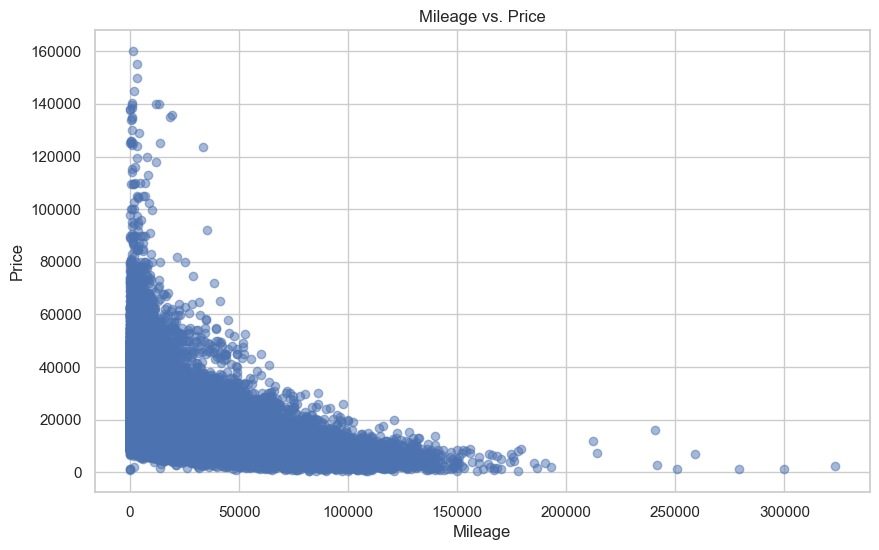

In [256]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.5, color='b')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

This scatter plot shows that the data distribution is skewed and will require standardization to build an optimal model.
Here, I will normalize or scale the 'mileage' values to bring them to a similar scale, which will help improve the performance of the ML models. Common techniques include Min-Max scaling or Standardization.

Descriptive Statistics:
count     97712.000000
mean      23219.475499
std       21060.882301
min           1.000000
25%        7673.000000
50%       17682.500000
75%       32500.000000
max      323000.000000
Name: mileage, dtype: float64


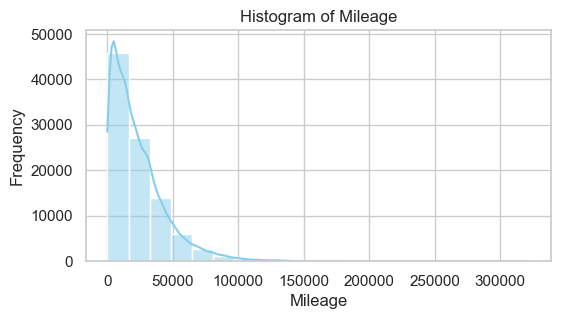

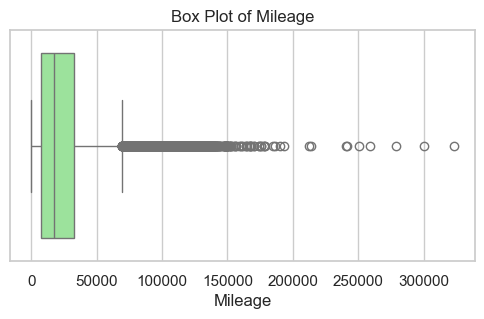

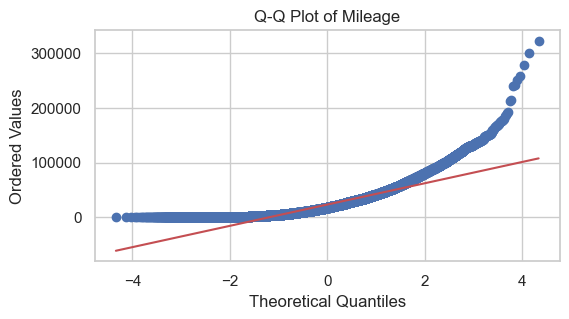

In [442]:
mileage = df['mileage']

print("Descriptive Statistics:")
print(mileage.describe())

plt.figure(figsize=(6, 3))
sns.histplot(mileage, kde=True, color='skyblue', bins=20)
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=mileage, color='lightgreen')
plt.title('Box Plot of Mileage')
plt.xlabel('Mileage')
plt.show()

from scipy import stats
plt.figure(figsize=(6, 3))
stats.probplot(mileage, dist="norm", plot=plt)
plt.title('Q-Q Plot of Mileage')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

QQ plots that look like this usually mean the data is skewed.

The mean mileage is approximately 23,219.48, with a standard deviation of 21,060.88, indicating a relatively high variability in the data.

The median mileage (50th percentile) is 17,682.5, which is lower than the mean, indicating a right-skewed distribution.
The interquartile range (IQR), which measures the spread of the middle 50% of the data, is from 7,673 to 32,500.
There are outliers present in the data, as evidenced by the large difference between the maximum value and the 75th percentile.
Given that the 'mileage' column is skewed and contains outliers, standardization (Z-score normalization) may be more appropriate than Min-Max scaling.

Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This can help mitigate the impact of outliers by making the data less sensitive to extreme values.
Standardization does not bound the data to a specific range, which is beneficial when dealing with skewed distributions and a wide range of values.

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mileage = df['mileage'].values.reshape(-1, 1)  #reshaping to 2D for scaling
df['mileage_standardized'] = scaler.fit_transform(mileage)

print(df[['mileage', 'mileage_standardized']])

       mileage  mileage_standardized
0        11630             -0.550287
1         9200             -0.665668
2         1614             -1.025863
3        30960              0.367533
4        19353             -0.183587
...        ...                   ...
97707     8337             -0.706644
97708    25372              0.102205
97709    19910             -0.157139
97710    24468              0.059282
97711    10586             -0.599858

[97712 rows x 2 columns]


Standardization ensures that all features are on the same scale. When features have different scales, some features may dominate the others in the modeling process, leading to biased results. Standardizing the features mitigates this issue by putting them on a comparable scale.

However, it's important to note that standardizing the data does not change its underlying distribution or characteristics. If the 'mileage' column was skewed and contained outliers before standardization, it will likely remain skewed and contain outliers after standardization.

Removing outliers and transforming the data may not necessarily improve the performance of the models. In fact, removing outliers could potentially remove valuable information that the model could use for making predictions. Which will prove true for the "Mileage" feature.

As the value for any random car's mileage does not have a certain minimum & maximum value and with its high corelation with the target variabe (price), removing of the outliers here will result in loss of information.

# **TAX**

Whether to include the 'tax' column in your car price prediction model depends on various factors, including the relevance of the feature to predicting car prices, its correlation with the target variable ('price').

In some cases, taxes may significantly affect the final cost of a car and could be an important predictor of its price. For example, higher tax rates may lead to higher car prices, especially in regions with steep taxes on luxury vehicles.

Correlation coefficient between 'tax' and 'price': 0.30700324504842363


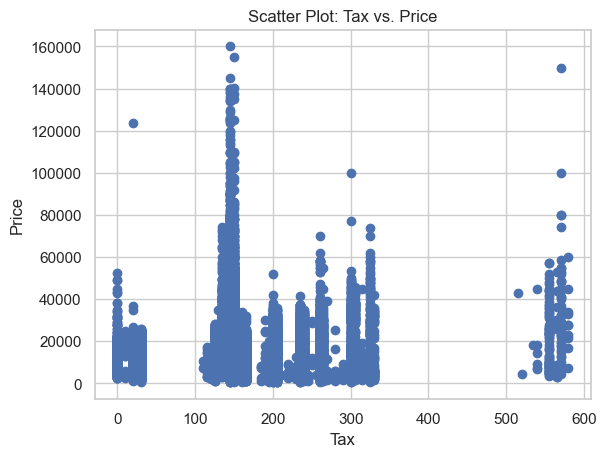

In [259]:
correlation = df['tax'].corr(df['price'])
print("Correlation coefficient between 'tax' and 'price':", correlation)

plt.scatter(df['tax'], df['price'])
plt.xlabel('Tax')
plt.ylabel('Price')
plt.title('Scatter Plot: Tax vs. Price')
plt.show()

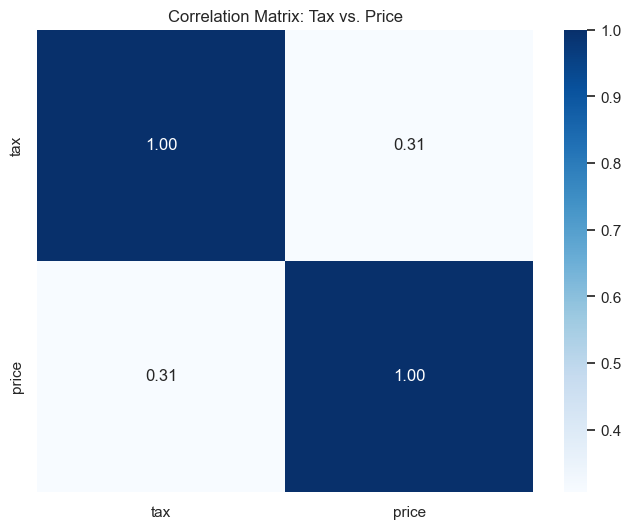

In [260]:
correlation_matrix = df[['tax', 'price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix: Tax vs. Price')
plt.show()

The correlation coefficient between tax and price is  0.31, which indicates a moderate degree of linear regression.
A positive correlation means that as the tax increases, the price tends to increase as well.

There are a few possible explanations for this weak positive correlation. One possibility is that taxes are based on a percentage of the price of goods. So, if the price of a good goes up, the tax on that good will also go up. However, there could be other factors that affect the price of a good, such as the cost of production or supply and demand. These other factors could cause the price to increase or decrease, even if the tax stays the same. Another possibility is that certain high-priced goods are also taxed more heavily.

Overall, the scatter plot shows a positive correlation between tax and price. This means that there is a tendency for prices to increase as taxes increase.

In [261]:
scaler = StandardScaler()
mileage = df['tax'].values.reshape(-1, 1)  #reshaping to 2D for scaling
df['tax_standardized'] = scaler.fit_transform(mileage)

print(df[['tax', 'tax_standardized']])

       tax  tax_standardized
0      145          0.392342
1      145          0.392342
2      145          0.392342
3      150          0.471260
4      125          0.076670
...    ...               ...
97707  145          0.392342
97708   30         -1.422771
97709  125          0.076670
97710  125          0.076670
97711  150          0.471260

[97712 rows x 2 columns]


# **MPG**

"MPG" stands for "miles per gallon." It is a measure of the fuel efficiency of a vehicle, indicating the distance in miles that a car can travel per gallon of fuel consumed.

MPG is an important metric for consumers and regulators alike, as it helps to compare the fuel efficiency of different vehicles. Higher MPG values indicate better fuel efficiency, meaning the vehicle can travel farther on less fuel.

Descriptive Statistics:
count    97712.000000
mean        55.205623
std         16.181659
min          0.300000
25%         47.100000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64


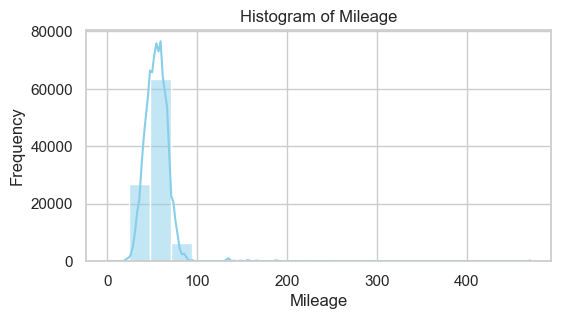

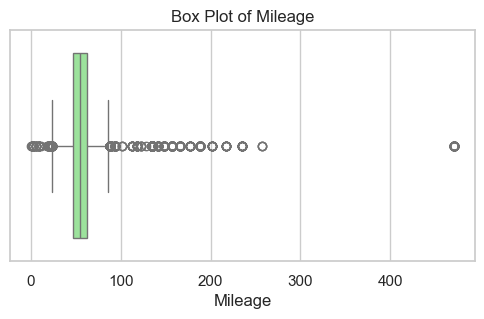

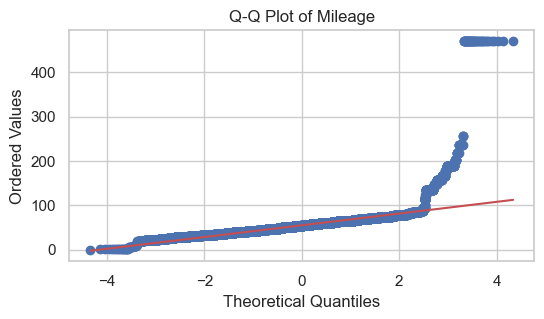

In [262]:
mpg = df['mpg']

print("Descriptive Statistics:")
print(mpg.describe())

plt.figure(figsize=(6, 3))
sns.histplot(mpg, kde=True, color='skyblue', bins=20)
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=mpg, color='lightgreen')
plt.title('Box Plot of Mileage')
plt.xlabel('Mileage')
plt.show()

from scipy import stats
plt.figure(figsize=(6, 3))
stats.probplot(mpg, dist="norm", plot=plt)
plt.title('Q-Q Plot of Mileage')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

Left tail: There seems to be a cluster of points below the line in the left tail. This indicates that there are more data points with lower mileage than what would be expected in a normal distribution.
Right tail: There are also data points above the line in the right tail, but to a lesser extent compared to the left tail. This suggests that there are data points with very high mileage than what would be expected in a normal distribution, but still more than a perfect normal distribution.

This indicates presence of outliers & needs more careful consideration at a micro level, which is done below.

In [263]:
max_mpg_per_fueltype = df.groupby('fuelType').apply(lambda x: x.nlargest(5, 'mpg'))[['fuelType', 'mpg']].reset_index(drop=True)
min_mpg_per_fueltype = df.groupby('fuelType').apply(lambda x: x.nsmallest(5, 'mpg'))[['fuelType', 'mpg']].reset_index(drop=True)

max_mpg_pivot = max_mpg_per_fueltype.pivot_table(index=None, columns='fuelType', values='mpg')
min_mpg_pivot = min_mpg_per_fueltype.pivot_table(index=None, columns='fuelType', values='mpg')

print("Top 5 Maximum MPG Values for Each Fuel Type:")
print(max_mpg_pivot)
print("\nTop 5 Minimum MPG Values for Each Fuel Type:")
print(min_mpg_pivot)

Top 5 Maximum MPG Values for Each Fuel Type:
fuelType  Diesel  Electric  Hybrid  Other  Petrol
mpg       115.74    343.02   470.8  470.8  121.06

Top 5 Minimum MPG Values for Each Fuel Type:
fuelType  Diesel  Electric  Hybrid  Other  Petrol
mpg          2.8    262.32     1.1  28.64    12.4


C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\230422935.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_mpg_per_fueltype = df.groupby('fuelType').apply(lambda x: x.nlargest(5, 'mpg'))[['fuelType', 'mpg']].reset_index(drop=True)
C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\230422935.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_mpg_per_fueltype = df.groupby('fuelType').apply(lambda x

**Diesel engines have higher fuel efficiency/mpg compared to petrol (gasoline) engines.** However the above stats show a higher mpg for petrol (121.06) compared to diesel (115.74).

This indicates the presence of outliers which will be dealt with using the IQR (Inter Quartile Range)

In [264]:
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.copy()
df['mpg'] = df['mpg'].clip(lower=lower_bound, upper=upper_bound)

df.head()


DataFrame with Outliers Replaced:


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,year,mileage_standardized,tax_standardized
0,I10,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,2010s,5,-0.550287,0.392342
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,2010s,5,-0.665668,0.392342
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,2010s,5,-1.025863,0.392342
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,2010s,5,0.367533,0.471260
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.2,ford,2010s,5,-0.183587,0.076670


Descriptive Statistics:
count    97712.000000
mean        54.671246
std         11.517956
min         23.550000
25%         47.100000
50%         54.300000
75%         62.800000
max         86.350000
Name: mpg, dtype: float64


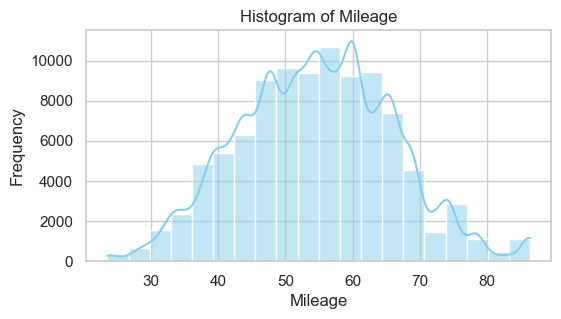

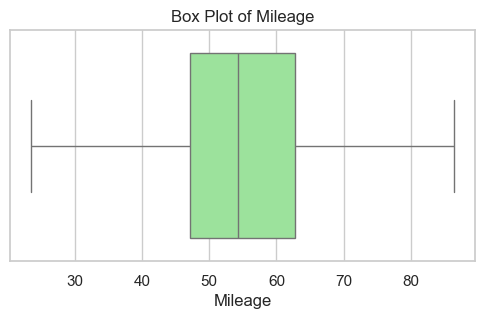

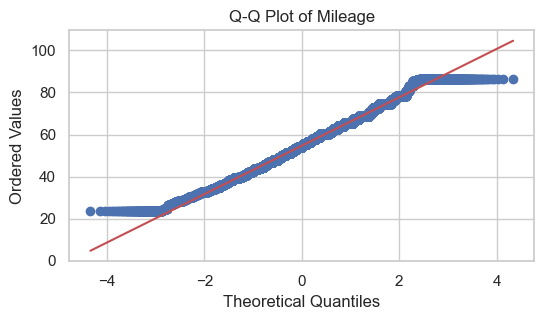

In [265]:
mpg = df['mpg']

# Descriptive statistics
print("Descriptive Statistics:")
print(mpg.describe())

# Histogram
plt.figure(figsize=(6, 3))
sns.histplot(mpg, kde=True, color='skyblue', bins=20)
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(6, 3))
sns.boxplot(x=mpg, color='lightgreen')
plt.title('Box Plot of Mileage')
plt.xlabel('Mileage')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(6, 3))
stats.probplot(mpg, dist="norm", plot=plt)
plt.title('Q-Q Plot of Mileage')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [267]:
scaler = StandardScaler()
mpg = df['mpg'].values.reshape(-1, 1)
df['mpg_standardized'] = scaler.fit_transform(mpg)

print(df[['mpg', 'mpg_standardized']])

        mpg  mpg_standardized
0      60.1          0.471332
1      58.9          0.367146
2      49.6         -0.440293
3      62.8          0.705750
4      54.3         -0.032232
...     ...               ...
97707  54.3         -0.032232
97708  61.4          0.584200
97709  54.3         -0.032232
97710  50.4         -0.370836
97711  48.7         -0.518432

[97712 rows x 2 columns]


# **PRICE**

<Axes: xlabel='year', ylabel='price'>

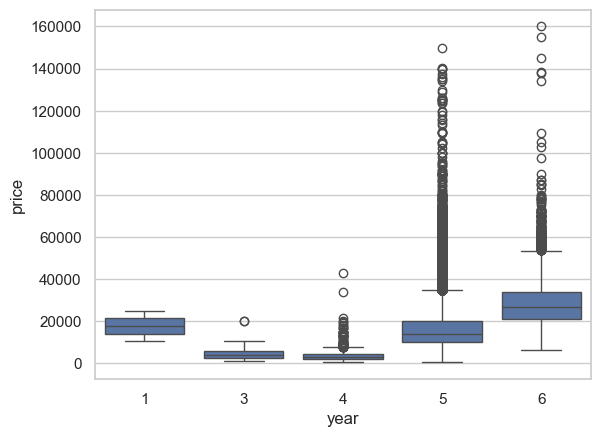

In [268]:
sns.boxplot(x='year', y='price', data=df)

<Axes: xlabel='fuelType', ylabel='price'>

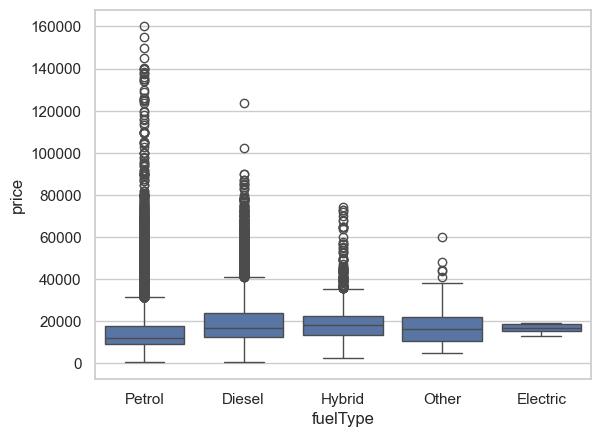

In [269]:
sns.boxplot(x='fuelType', y='price', data=df)

As we saw in the previous analysis, outliers were not removed from the dataset. This decision was made because these outliers are not errors or incorrect data points; instead, they represent genuine and accurate information that doesn't fit neatly with the rest of the data. These outliers contain valuable insights and should be kept in the dataset rather than being discarded.

Now, being the target variable we need to balance the data. Having a balanced target variable is desirable because it helps the model learn to make predictions **without being biased** towards the majority class.

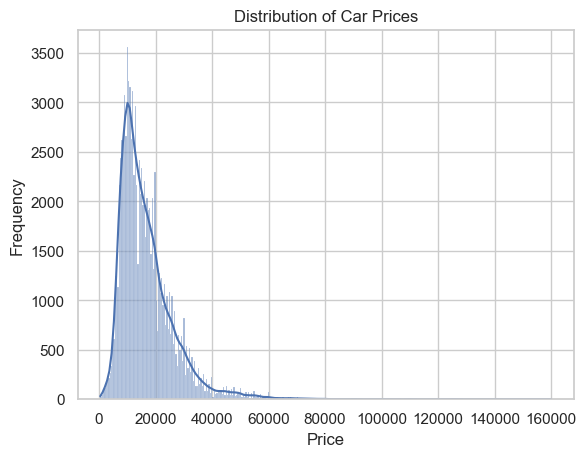

In [444]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

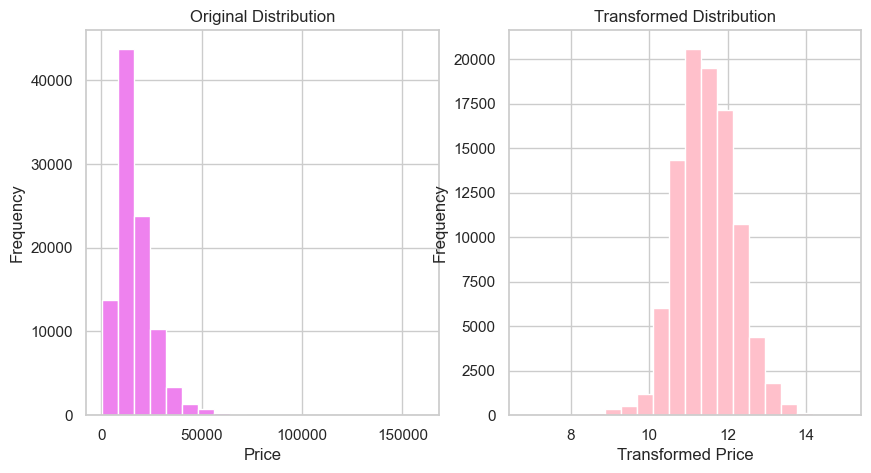

In [445]:
from scipy.stats import boxcox

# Box-Cox Transformation
transformed_price, lambda_value = boxcox(df['price'])

df['transformed_price'] = transformed_price

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(df['price'], bins=20, color='violet')
ax[0].set_title('Original Distribution')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

ax[1].hist(transformed_price, bins=20, color='pink')
ax[1].set_title('Transformed Distribution')
ax[1].set_xlabel('Transformed Price')
ax[1].set_ylabel('Frequency')

plt.show()

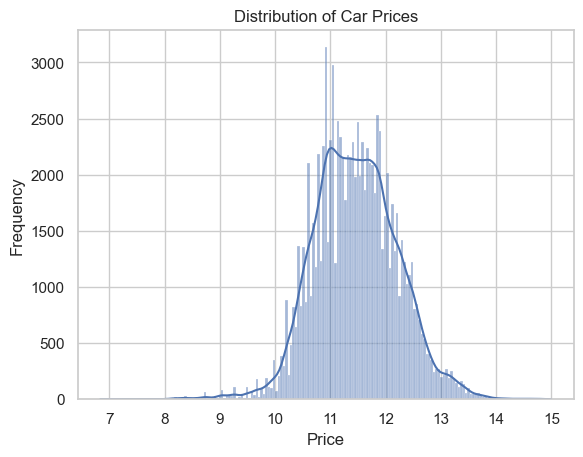

In [272]:
sns.histplot(df['transformed_price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Here the Box-Cox transformation is applied to data for Normalization, Stabilizing Variance, Addressing Skewness and Enhancing Interpretability.



# **MODEL**

In [273]:
model_frequency = df['model'].value_counts()
print(model_frequency.describe())

count     196.000000
mean      498.530612
std       901.757625
min         1.000000
25%        20.250000
50%       121.500000
75%       526.000000
max      6509.000000
Name: count, dtype: float64


Frequency Encoding: Instead of using one-hot encoding or label encoding, which would create a large number of features (one for each unique model), we could consider encoding the 'model' column based on the frequency of occurrence. This means replacing each model name with its corresponding frequency in the dataset. Models that occur more frequently will have higher encoded values, and models that occur less frequently will have lower encoded values.

However, frequency encoding is not viable option because, premium cars have a lower frequency count, they are manufactured in small numbers but have higher price. Cheaper cars have a higher frequency but low price. Frequency encoding will create a bias towards the cheaper car models.

In [446]:
from scipy.stats import f_oneway

# Performing ANOVA test
anova_result = f_oneway(*[df['price'][df['model'] == model] for model in df['model'].unique()])

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-statistic: 808.7722950941816
ANOVA p-value: 0.0


To understand if this knowledge is applicable in the data, I performed the ANOVA test which proved the hypothesis to be true.

The ANOVA F-statistic and p-value provide insights into whether there are significant differences in the mean prices across different models.

1. **ANOVA F-statistic**: The F-statistic measures the ratio of the variance between groups to the variance within groups. In this case, the F-statistic is 808.772. This suggests that there are significant differences in the mean prices across the different models.

2. **ANOVA p-value**: In this case, the p-value is reported as 0.0. This doesn't mean the p-value is exactly zero, but rather, it's very close to zero. It's essentially indicating strong evidence against the null hypothesis. Indicating that the observed differences in mean prices across models are unlikely to have occurred by chance.

Therefore,
- The observed differences in mean prices across models are statistically significant.
- This suggests that the 'model' variable has a significant effect on the 'price' variable.

**Model column is heavily corelated & heavily imbalanced for target encoding**

**Hence I performed Custom Encoding based on Price Ranges: Manually encode the "model" column based on price range, creating categories like "economy," "mid-range," and "premium" based on intuition about price distributions within each model category. This approach allows to explicitly capture the relationship between model frequency and price without relying solely on statistical measures.**

In [275]:
top_high_price_models = df.sort_values(by='price', ascending=False).head(5)

# Sort the data by price in ascending order to get the top 5 models with the least price
top_low_price_models = df.sort_values(by='price', ascending=True).head(5)

print("Top 5 models with the highest price:")
print(top_high_price_models[['Manufacturer', 'model', 'price']])

print("\nTop 5 models with the least price:")
print(top_low_price_models[['Manufacturer', 'model', 'price', 'mileage', 'decade']])

Top 5 models with the highest price:
      Manufacturer      model   price
92579         merc    G Class  159999
57333         merc    G Class  154998
21480         merc   SL CLASS  149948
28942         Audi         R8  145000
66714         merc    A Class  140319

Top 5 models with the least price:
      Manufacturer   model  price  mileage decade
35922     vauxhall   Astra    450   159000  2000s
14428     vauxhall   Agila    450    90000  2000s
28706     vauxhall   Corsa    495    99842  2000s
71524         ford   Focus    495   177644  2000s
53522     vauxhall   Corsa    590    82000  2000s


Mercedes-Benz A 220 will likely start around USD 34,000. Audi R8 starts at USD 161,395 and goes up to USD 253,290 depending on the trim and options. Mercedes-AMG SL-Class is expected to start around USD 111,000 and go up to USD 200,000.

It's quite unlikely to find a second-hand Vauxhall Astra in good condition for as low as $450 USD. Cars typically depreciate in value over time, but even older vehicles tend to hold more value than that due to the costs associated with manufacturing, maintenance, and resale. Additionally, the Vauxhall Astra is a popular model, and its resale value tends to be higher compared to very old or severely damaged vehicles.

**Here, creating bins is the best way possible**

In [447]:
median = df['price'].quantile(0.50)

# Calculate the absolute differences between each car's price and the 50th percentile
df['price_difference'] = abs(df['price'] - median)

sorted_df = df.sort_values(by='price_difference')

nearest_cars = sorted_df.head(5)[['Manufacturer', 'model', 'price']]

print("5 cars nearest to the 50% mark of the price data:")
print(nearest_cars)

5 cars nearest to the 50% mark of the price data:
      Manufacturer      model  price
45974          BMW   2 Series  14470
15229     vauxhall    Mokka X  14470
47388   volkswagen       Polo  14470
50896       hyundi       Kona  14470
93796     vauxhall    Mokka X  14470


BMW 2-series starts at USD 39,795 and goes up to USD 52,695.

Volkswagen Polo range from USD 14410 to USD 34650.

Vauxhall Mokka X has a starting price of GBP 17,590 which is 23,910 USD.

**here, BMW is a luxury car while the rest fall under the category of mid-range cars**

In [448]:
# Calculate the 25th percentile (25% mark) of the price data
percentile_25 = df['price'].quantile(0.25)

df['price_difference'] = abs(df['price'] - percentile_25)

sorted_df = df.sort_values(by='price_difference')

nearest_cars = sorted_df.head(5)[['Manufacturer', 'model', 'price']]

print("5 cars nearest to the 25% mark of the price data:")
print(nearest_cars)

5 cars nearest to the 25% mark of the price data:
      Manufacturer     model  price
87027         ford    Fiesta   9999
16055         ford    Fiesta   9999
77489     vauxhall     Corsa   9999
41651         ford     Focus   9999
75197     vauxhall   Mokka X   9999


Ford Fiesta is available from USD 29,810 to USD 35,970.

Vauxhall Corsa is primarily sold in the European market, and it's less common to find it priced in USD.
The range starts at GBP 19,625 (British Pound) which would be 26,740 USD

**These are mid range cars**        

In [449]:
# Calculate the 75th percentile (75% mark) of the price data
percentile_75 = df['price'].quantile(0.75)

df['price_difference'] = abs(df['price'] - percentile_75)

sorted_df = df.sort_values(by='price_difference')

nearest_cars = sorted_df.head(5)[['Manufacturer', 'model', 'price']]

print("5 cars nearest to the 75% mark of the price data:")
print(nearest_cars)

5 cars nearest to the 75% mark of the price data:
      Manufacturer     model  price
9452    volkswagen    Touran  20750
56300         ford    Mondeo  20750
46203          BMW        X3  20750
20823       toyota      RAV4  20750
83754         merc   A Class  20750


Volkswagen Touran Price starts at USD 47,620.

Ford Mondeo - USD 30,580.

BMW X3 starts at USD 47,895.

**BMW & Merc are luxury cars & the rest are mid-range**

While the above code clearly shows that price & models have a strong corelation. The **overlapping of mid-range and luxury car models at the 50th percentile could belong to another additional feature like mileage**. To test & visualize the relationship between the "model" column and price, considering different levels of mileage:

C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\922141339.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_mileage_price_stats = df.groupby(['model', 'mileage_range'])['price'].median().reset_index()


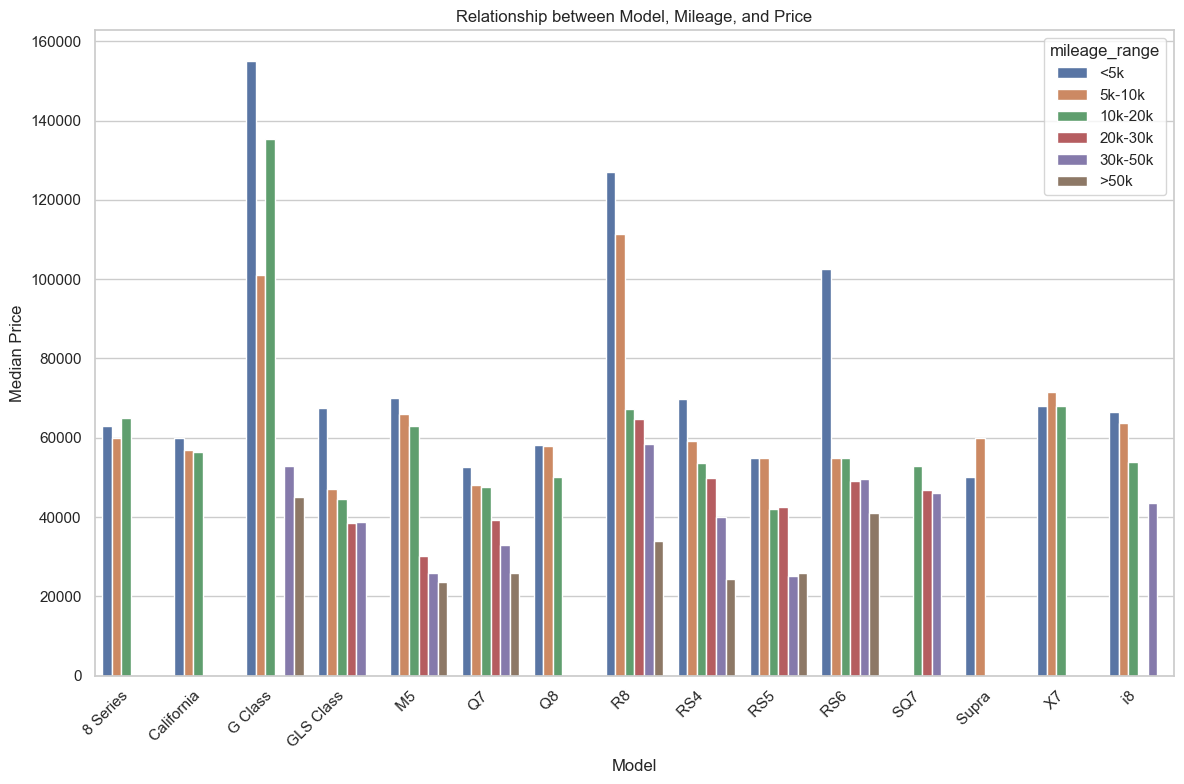

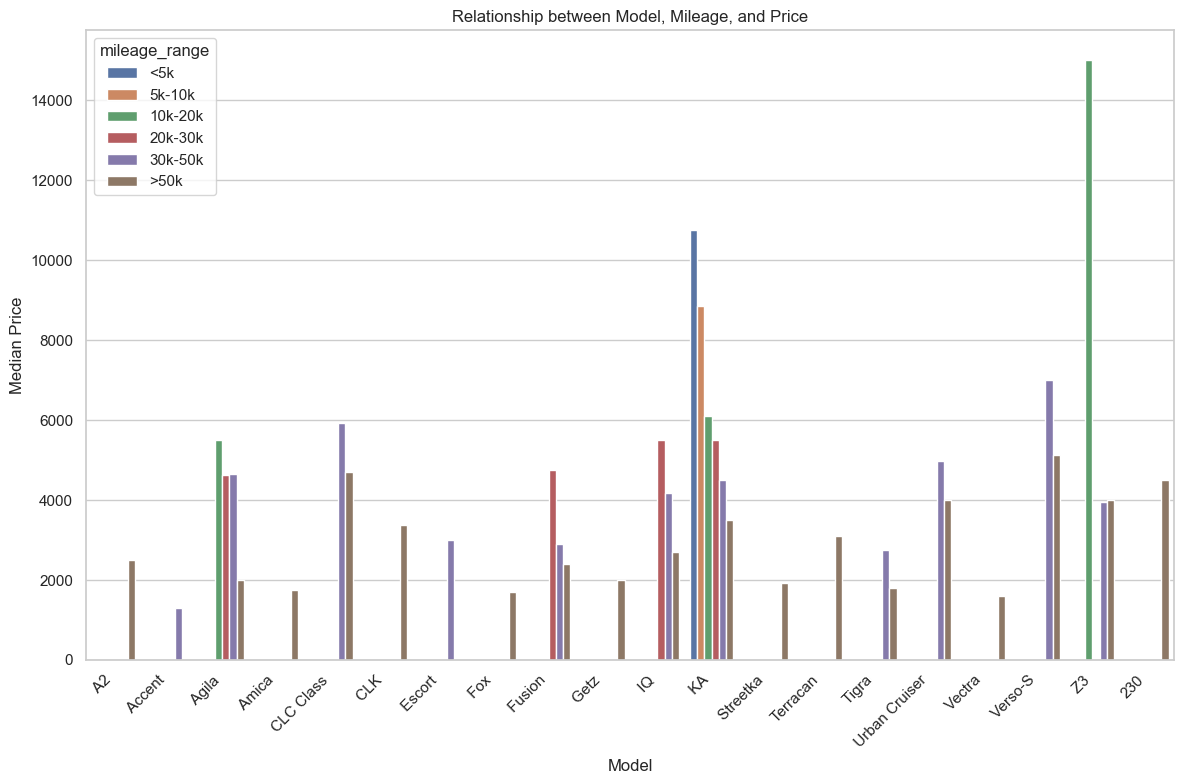

In [279]:
mileage_bins = [0, 5000, 10000, 20000, 30000, 50000, float('inf')]
mileage_labels = ['<5k', '5k-10k', '10k-20k', '20k-30k', '30k-50k', '>50k']

df['mileage_range'] = pd.cut(df['mileage'], bins=mileage_bins, labels=mileage_labels)

model_mileage_price_stats = df.groupby(['model', 'mileage_range'])['price'].median().reset_index()

top_n_models = model_mileage_price_stats.groupby('model')['price'].median().sort_values(ascending=False).head(15).index
bottom_n_models = model_mileage_price_stats.groupby('model')['price'].median().sort_values(ascending=False).tail(20).index

top_n_data = model_mileage_price_stats[model_mileage_price_stats['model'].isin(top_n_models)]
bottom_n_data = model_mileage_price_stats[model_mileage_price_stats['model'].isin(bottom_n_models)]

plt.figure(figsize=(12, 8))
sns.barplot(x='model', y='price', hue='mileage_range', data=top_n_data)
plt.title('Relationship between Model, Mileage, and Price')
plt.xlabel('Model')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='model', y='price', hue='mileage_range', data=bottom_n_data)
plt.title('Relationship between Model, Mileage, and Price')
plt.xlabel('Model')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mileage plays a huge part in the pricing of the same model. Categorizing the models into bins based solely on the price is insufficient.

Here, we create bins for categorizing the 196 models based on both price and mileage, we use a clustering technique such as K-means clustering. K-means clustering will group the models into clusters based on their similarity in price and mileage. We can then assign labels to these clusters representing different categories such as economy, mid-range, and luxury.

Preprocessing: Scale the 'price' and 'mileage' columns to ensure they have similar ranges, as K-means clustering is sensitive to the scale of the features.

Feature Selection: Select the relevant features ('price' and 'mileage') for clustering.

Clustering: Apply K-means clustering to the selected features. Choose the appropriate number of clusters (bins) based on domain knowledge or using techniques like the elbow method.

Assign Labels: After clustering, assign labels to each cluster representing different categories (e.g., economy, mid-range, luxury).

Visualization: Visualize the clusters to understand how the models are grouped based on price and mileage.

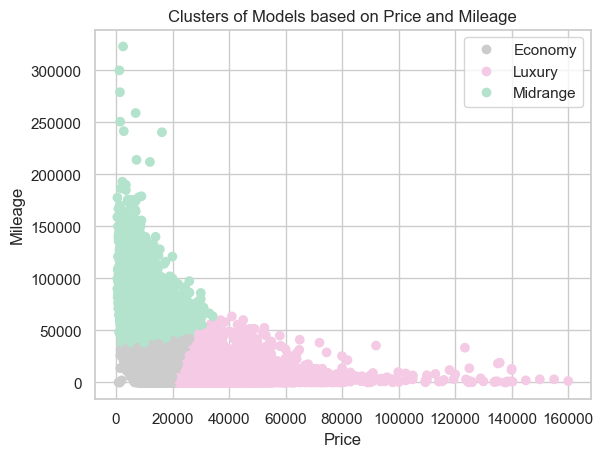

In [288]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = df[['price', 'mileage']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)
cluster_means = df.groupby('cluster')[['price', 'mileage']].mean()

# Swap the labels
labels = ['Economy', 'Luxury', 'Midrange']

# Update the mapping to swap 'Luxury' and 'Midrange'
df['category'] = df['cluster'].map({0: labels[0], 1: labels[1], 2: labels[2]})

scatter = plt.scatter(df['price'], df['mileage'], c=df['cluster'], cmap='Pastel2_r')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clusters of Models based on Price and Mileage')

# Update legend labels
legend_labels = {i: label for i, label in enumerate(labels)}
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values())
plt.show()

In [289]:
df['mileage_range'].values

['10k-20k', '5k-10k', '<5k', '30k-50k', '10k-20k', ..., '5k-10k', '20k-30k', '10k-20k', '20k-30k', '10k-20k']
Length: 97712
Categories (6, object): ['<5k' < '5k-10k' < '10k-20k' < '20k-30k' < '30k-50k' < '>50k']

C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\435458883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='transformed_price', data=df, palette='Pastel2_r')


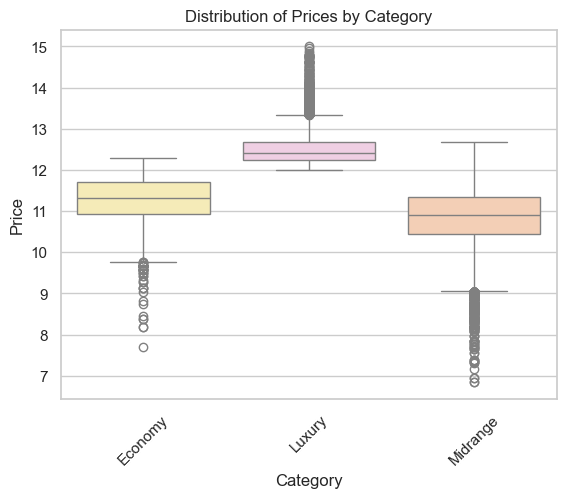

In [290]:
sns.set(style="whitegrid")

sns.boxplot(x='category', y='transformed_price', data=df, palette='Pastel2_r')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Distribution of Prices by Category')

plt.xticks(rotation=45)
plt.show()

In the context of encoding the 'model' column based on the 'category' column and considering that luxury cars are typically associated with higher prices, it makes sense to encode luxury cars as 3, midrange cars as 2, and economy cars as 1.

This encoding scheme aligns with the assumption that luxury cars generally have higher prices compared to midrange and economy cars. Therefore, assigning higher numerical values to luxury cars allows the model to capture this relationship and potentially learn distinctions between different price ranges more effectively.

encoding the categories as 3 (Luxury), 2 (Midrange), and 1 (Economy) based on their expected price levels

In [291]:
category_mapping = {'Economy': 1, 'Midrange': 2, 'Luxury': 3}
df['encoded_model'] = df['category'].map(category_mapping)
df[['model', 'category', 'encoded_model']].head()

,model,category,encoded_model
0,I10,Economy,1
1,Polo,Economy,1
2,2 Series,Luxury,3
3,Yeti Outdoor,Economy,1
4,Fiesta,Economy,1


Preserving Information: By encoding the 'model' column based on the 'category' column, we retain some information about the relationship between different car models and their corresponding price categories. This can help the model better understand the underlying patterns in the data.

Maintaining Order: The encoding scheme you proposed (Luxury as 3, Midrange as 2, and Economy as 1) preserves the order of the categories based on their expected price levels. This order can be meaningful for the model to learn from.

Potential Loss of Granularity: While this encoding captures the broad price categories, it does sacrifice some granularity by collapsing multiple models within the same category into a single numerical value. This loss of granularity may or may not impact the model's performance, depending on the dataset and the complexity of the relationships between models and prices.

# **TRANSMISSION**

In [292]:
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,year,mileage_standardized,tax_standardized,mpg_standardized,transformed_price,price_difference,mileage_range,cluster,category,encoded_model
0,I10,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,2010s,5,-0.550287,0.392342,0.471332,10.529052,13255.0,10k-20k,0,Economy,1
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,2010s,5,-0.665668,0.392342,0.367146,11.061052,9761.0,5k-10k,0,Economy,1
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,2010s,5,-1.025863,0.392342,-0.440293,12.392276,7240.0,<5k,1,Luxury,3
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,2010s,5,0.367533,0.471260,0.705750,11.241266,8255.0,30k-50k,0,Economy,1
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.2,ford,2010s,5,-0.183587,0.076670,-0.032232,10.619013,12751.0,10k-20k,0,Economy,1


In [293]:
df['transmission'].value_counts()

transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64

In [294]:
df[df['transmission'] == 'Other']

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,year,mileage_standardized,tax_standardized,mpg_standardized,transformed_price,price_difference,mileage_range,cluster,category,encoded_model
11457,Mokka,22499,Other,4500,Petrol,145,42.2,1.5,vauxhall,2010s,5,-0.888831,0.392342,-1.082771,12.077303,1749.0,<5k,1,Luxury,3
15221,Scala,15999,Other,3500,Petrol,145,47.1,1.0,skoda,2010s,5,-0.936313,0.392342,-0.657346,11.590490,4751.0,<5k,0,Economy,1
16356,GLA Class,18700,Other,30895,Other,125,56.5,0.0,merc,2010s,5,0.364446,0.076670,0.158775,11.812484,2050.0,30k-50k,0,Economy,1
38284,SLK,12995,Other,39000,Diesel,150,56.5,2.1,merc,2010s,5,0.749285,0.471260,0.158775,11.296488,7755.0,30k-50k,2,Midrange,2
48193,Mokka,13499,Other,3000,Petrol,145,44.8,1.4,vauxhall,2010s,5,-0.960054,0.392342,-0.857035,11.350116,7251.0,<5k,0,Economy,1
49375,Ioniq,12495,Other,27779,Hybrid,0,78.5,1.6,hyundi,2010s,5,0.216494,-1.896279,2.068846,11.241266,8255.0,20k-30k,0,Economy,1
59185,Yaris,12795,Other,16733,Hybrid,0,78.0,1.5,toyota,2010s,5,-0.307988,-1.896279,2.025435,11.274649,7955.0,10k-20k,0,Economy,1
66522,Mokka,19995,Other,1450,Diesel,145,57.7,1.5,vauxhall,2010s,5,-1.033650,0.392342,0.262961,11.908155,755.0,<5k,0,Economy,1
94860,Tucson,16995,Other,25915,Petrol,145,39.8,1.6,hyundi,2010s,5,0.127988,0.392342,-1.291142,11.676284,3755.0,20k-30k,0,Economy,1


Trying to manually understand the "Other" transmission type

1. Vauxhall Mokka:
   - Manual Transmission
   - Automatic Transmission (Possibly traditional automatic or dual-clutch automatic)

2. Škoda Scala:
   - Manual Transmission
   - Automatic Transmission (Possibly traditional automatic or dual-clutch automatic)

3. Mercedes-Benz GLA Class:
   - Automatic Transmission (Possibly traditional automatic or dual-clutch automatic)
   - 4MATIC All-Wheel Drive available

4. Mercedes-Benz SLK (Known as SLC in newer models):
   - Automatic Transmission (Possibly traditional automatic or dual-clutch automatic)
   - Some models may have manual transmission options

5. Hyundai Ioniq:
   - Automatic Transmission (Depending on the variant, could be traditional automatic or a dual-clutch automatic)
   - Hybrid/Electric Powertrain

6. Toyota Yaris:
   - Manual Transmission
   - Automatic Transmission (Possibly traditional automatic or CVT)

7. Hyundai Tucson:
   - Manual Transmission
   - Automatic Transmission (Possibly traditional automatic or dual-clutch automatic)

1. **Fuel Type:**
   - **Manual Transmissions:** Manual transmissions are commonly found in vehicles with both gasoline (petrol) and diesel engines. They are often preferred by enthusiasts for their direct control and fuel efficiency.
   - **Automatic Transmissions:** Automatic transmissions are also available in both gasoline and diesel vehicles. They are often chosen for their convenience and smoothness of operation, especially in urban driving conditions.

2. **Engine Size:**
   - **Manual Transmissions:** Manual transmissions are often paired with smaller engines, particularly in economy cars or sporty models where drivers may prefer the more engaging driving experience offered by a manual gearbox. However, they can also be found in larger vehicles, particularly those focused on performance.
   - **Automatic Transmissions:** Automatic transmissions are commonly paired with a wide range of engine sizes, from small economy engines to larger, more powerful engines. They are often chosen for their ease of use and can be found in vehicles across various segments.

3. **Transmission Type and Efficiency:**
   - In recent years, there has been a trend towards using automatic transmissions with smaller, turbocharged engines to improve fuel efficiency and reduce emissions. This is particularly true for vehicles equipped with modern automatic transmissions such as dual-clutch transmissions or continuously variable transmissions (CVTs).
   - Manual transmissions, while often associated with better fuel efficiency due to their mechanical simplicity, may not always offer better fuel economy than automatic transmissions, especially in city driving conditions where automatics can optimize gear shifts for efficiency.

4. **Hybrid and Electric Vehicles:**
   - Hybrid and electric vehicles often feature automatic transmissions, though they may operate differently from traditional automatics due to the nature of their powertrains. Electric vehicles, for example, typically do not require a traditional transmission, instead using a single-speed gearbox or direct-drive system.

Because I cannot reliably determine the transmission type for these records, I have choosen to keep the label as 'Other' to indicate uncertainty and not tamper incorrectly with the data.

In [450]:
transmission_column = df['transmission']

one_hot_encoded_df = pd.get_dummies(transmission_column, prefix='transmission')
df = pd.concat([df, one_hot_encoded_df], axis=1)
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,year,mpg_bins,price_bins,transformed_price,price_difference,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,I10,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,2010s,5,NaN,"(0, 10000]",10.529052,13255.0,False,True,False,False
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,2010s,5,"(50.0, 60.0]","(10000, 20000]",11.061052,9761.0,False,True,False,False
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,2010s,5,"(40.0, 50.0]","(20000, 30000]",12.392276,7240.0,False,False,False,True
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,2010s,5,NaN,"(10000, 20000]",11.241266,8255.0,False,True,False,False
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.2,ford,2010s,5,"(50.0, 60.0]","(0, 10000]",10.619013,12751.0,False,True,False,False


Performing one hot encoding on the transmission columns to prevent bias and not create a hierarchy amongst the transmission types.

# **FUEL TYPE**

In [296]:
df['fuelType'].value_counts()

fuelType
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: count, dtype: int64

Other (This category might include alternative fuels like natural gas, LPG, biodiesel, etc.): 246 cars


In [297]:
df[df['fuelType'] == 'Other']

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,transformed_price,price_difference,mileage_range,cluster,category,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
445,3 Series,15300,Automatic,39428,Other,0,86.35,2.0,BMW,2010s,...,11.527147,5450.0,30k-50k,2,Midrange,2,True,False,False,False
544,Prius,21990,Automatic,30862,Other,10,64.20,1.8,toyota,2010s,...,12.044441,1240.0,30k-50k,0,Economy,1,True,False,False,False
698,Prius,24395,Automatic,4092,Other,140,61.40,1.8,toyota,2010s,...,12.193709,3645.0,<5k,1,Luxury,3,True,False,False,False
895,Fabia,10980,Automatic,20000,Other,145,60.10,1.2,skoda,2010s,...,11.059905,9770.0,10k-20k,0,Economy,1,True,False,False,False
1292,Ioniq,12800,Automatic,54698,Other,140,78.50,1.6,hyundi,2010s,...,11.275199,7950.0,>50k,2,Midrange,2,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96298,Tiguan,25995,Automatic,22801,Other,235,38.20,2.0,volkswagen,2010s,...,12.285346,5245.0,20k-30k,1,Luxury,3,True,False,False,False
96418,Aygo,9495,Automatic,23378,Other,150,67.30,1.0,toyota,2010s,...,10.857023,11255.0,20k-30k,0,Economy,1,True,False,False,False
96562,3 Series,14475,Automatic,78878,Other,0,86.35,2.0,BMW,2010s,...,11.448695,6275.0,>50k,2,Midrange,2,True,False,False,False
97259,RAV4,18000,Automatic,26972,Other,205,43.50,2.0,toyota,2010s,...,11.758076,2750.0,20k-30k,0,Economy,1,True,False,False,False


Manual Transmission and Fuel Type: Manual transmission cars are commonly associated with petrol and diesel engines. They are often preferred by driving enthusiasts for their control and engagement. However, they can also be found in hybrid vehicles.

Automatic Transmission and Fuel Type: Automatic transmission cars are versatile and can be found across different fuel types, including petrol, diesel, hybrid, and electric. They are popular for their convenience, especially in urban driving conditions.

Hybrid Transmission and Fuel Type: Hybrid vehicles typically use automatic transmission coupled with a combination of petrol or diesel engines and electric motors. This setup allows for better fuel efficiency and reduced emissions.

Electric Transmission and Fuel Type: Electric vehicles (EVs) do not have traditional transmissions, as they use electric motors that deliver power directly to the wheels. EVs are powered solely by electricity and do not require traditional fuels like petrol or diesel.

As the "Other" column data here represents missing data. AKA this column should include either of the 4 already entioned type. Since majority if not all the cars are available in all 4 fuel type variants, using random function.

The goal of this code is to replace ambiguous or unspecified fuel types ('Other') in a DataFrame with more specific fuel types based on transmission and probabilities derived from the provided counts of different fuel types.

In [298]:
import random

fuel_counts = {
    'Petrol': 53982,
    'Diesel': 40419,
    'Hybrid': 3059,
    'Other': 246
}

def replace_other(row):
    if row['transmission'] == 'Manual' and row['fuelType'] == 'Other':
        petrol_count = fuel_counts.get('Petrol', 0)
        diesel_count = fuel_counts.get('Diesel', 0)
        probabilities = [petrol_count / (petrol_count + diesel_count), diesel_count / (petrol_count + diesel_count)]
        new_fuel_type = random.choices(['Petrol', 'Diesel'], weights=probabilities)[0]
        return new_fuel_type
    elif row['transmission'] in ['Automatic', 'Semi-Auto', 'Other'] and row['fuelType'] == 'Other':
        fuel_types = ['Petrol', 'Diesel', 'Hybrid', 'Electric']
        counts = [fuel_counts.get(ft, 0) for ft in fuel_types]
        probabilities = [count / sum(counts) for count in counts]
        new_fuel_type = random.choices(fuel_types, weights=probabilities)[0]
        return new_fuel_type
    else:
        return row['fuelType']

df['fuelType'] = df.apply(replace_other, axis=1)

In [299]:
filtered_df = df[(df['fuelType'] == 'Other')]
filtered_df

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,transformed_price,price_difference,mileage_range,cluster,category,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto


In [300]:
df['fuelType'].value_counts()

fuelType
Petrol      54123
Diesel      40520
Hybrid       3063
Electric        6
Name: count, dtype: int64

In [301]:
fuelType_column = df['fuelType']

one_hot_encoded_df = pd.get_dummies(fuelType_column, prefix='fuelType')  #one-hot encoding
df = pd.concat([df, one_hot_encoded_df], axis=1)
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,category,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
0,I10,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,2010s,...,Economy,1,False,True,False,False,False,False,False,True
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,2010s,...,Economy,1,False,True,False,False,False,False,False,True
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,2010s,...,Luxury,3,False,False,False,True,True,False,False,False
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,2010s,...,Economy,1,False,True,False,False,True,False,False,False
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.2,ford,2010s,...,Economy,1,False,True,False,False,False,False,False,True


# **ENGINE SIZE**

In [302]:
df['engineSize'].value_counts().sort_index()

engineSize
0.0      268
0.6        7
1.0    17083
1.1      558
1.2     6718
1.3     1307
1.4    10893
1.5    11247
1.6     8700
1.7      907
1.8     1715
1.9       27
2.0    26886
2.1     3970
2.2      466
2.3      145
2.4       72
2.5      454
2.7        8
2.8       41
2.9      170
3.0     5395
3.2       27
3.5       20
3.7        2
4.0      355
4.1        2
4.2       26
4.3        1
4.4       79
4.5        1
4.7       24
5.0       52
5.2       23
5.4        1
5.5       44
6.0        2
6.2       13
6.3        1
6.6        2
Name: count, dtype: int64

In [303]:
df[df['engineSize'] == 0.6]

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,category,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
11129,i3,17000,Automatic,41063,Diesel,0,86.35,0.6,BMW,2010s,...,Midrange,2,True,False,False,False,True,False,False,False
14984,i3,14940,Automatic,59000,Petrol,0,86.35,0.6,BMW,2010s,...,Midrange,2,True,False,False,False,False,False,False,True
41701,i3,19500,Automatic,23956,Diesel,135,86.35,0.6,BMW,2010s,...,Economy,1,True,False,False,False,True,False,False,False
73077,i3,17600,Automatic,50867,Petrol,135,86.35,0.6,BMW,2010s,...,Midrange,2,True,False,False,False,False,False,False,True
85131,i3,20000,Automatic,19178,Petrol,0,86.35,0.6,BMW,2010s,...,Economy,1,True,False,False,False,False,False,False,True
89870,i3,19300,Automatic,32867,Diesel,0,86.35,0.6,BMW,2010s,...,Economy,1,True,False,False,False,True,False,False,False
90809,i3,17100,Automatic,25269,Diesel,0,86.35,0.6,BMW,2010s,...,Economy,1,True,False,False,False,True,False,False,False


The BMW i3, an electric car, doesn't have a traditional internal combustion engine. Instead, it is powered by an electric motor. However, it does have a small range extender option called the BMW i3 REx, which incorporates a small gasoline engine. The engine in the i3 REx is a 2-cylinder, 0.65-liter gasoline engine, which is used to generate electricity to recharge the battery, extending the vehicle's range beyond that of the battery alone.

In [304]:
df[df['engineSize'] == 0.0]

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,category,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
449,i3,19895,Automatic,29851,Hybrid,0,86.35,0.0,BMW,2010s,...,Economy,1,True,False,False,False,False,False,True,False
969,i3,14900,Automatic,59945,Hybrid,0,86.35,0.0,BMW,2010s,...,Midrange,2,True,False,False,False,False,False,True,False
1985,3 Series,18000,Automatic,24240,Diesel,150,64.20,0.0,BMW,2010s,...,Economy,1,True,False,False,False,True,False,False,False
2219,Astra,11000,Manual,14878,Petrol,145,51.40,0.0,vauxhall,2010s,...,Economy,1,False,True,False,False,False,False,False,True
3290,I10,7500,Manual,13637,Petrol,30,57.60,0.0,hyundi,2010s,...,Economy,1,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95623,Fiesta,12999,Manual,15000,Petrol,150,58.90,0.0,ford,2010s,...,Economy,1,False,True,False,False,False,False,False,True
95625,I20,11400,Automatic,12661,Petrol,145,44.10,0.0,hyundi,2010s,...,Economy,1,True,False,False,False,False,False,False,True
96910,Mondeo,5328,Manual,105000,Diesel,30,65.70,0.0,ford,2010s,...,Midrange,2,False,True,False,False,True,False,False,False
97033,I10,6300,Manual,17272,Petrol,20,61.40,0.0,hyundi,2010s,...,Economy,1,False,True,False,False,False,False,False,True


The engine size cannot be 0. Hence this is considered as NULL Value.

Predictive Imputation:

As I have other features that are correlated with engineSize, I have trained a regression model to predict missing engineSize values based on the values of other features.
Using the trained model to predict missing values and fill them accordingly.

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_with_missing_zero = df[df['engineSize'].isnull() | (df['engineSize'] == 0.0)]
data_complete = df[(~df['engineSize'].isnull()) & (df['engineSize'] != 0.0)]

X = data_complete[['mpg_standardized', 'encoded_model', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol']]
y = data_complete['engineSize']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

X_missing_zero = data_with_missing_zero[['mpg_standardized', 'encoded_model', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol']]
predicted_engine_sizes = regression_model.predict(X_missing_zero)

predicted_engine_sizes[predicted_engine_sizes < 0.1] = 0.1  # To ensure imputed values are non-zero
data_with_missing_zero['engineSize'] = np.maximum(predicted_engine_sizes, 0.1)

data_with_missing_zero.reset_index(drop=True, inplace=True)

df.loc[data_with_missing_zero.index, 'engineSize'] = data_with_missing_zero['engineSize']
df.head()

C:\Users\rashi\AppData\Local\Temp\ipykernel_7208\477885790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing_zero['engineSize'] = np.maximum(predicted_engine_sizes, 0.1)


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,category,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
0,I10,7495,Manual,11630,Petrol,145,60.1,1.460827,hyundi,2010s,...,Economy,1,False,True,False,False,False,False,False,True
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.544994,volkswagen,2010s,...,Economy,1,False,True,False,False,False,False,False,True
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,1.896587,BMW,2010s,...,Luxury,3,False,False,False,True,True,False,False,False
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,1.307156,skoda,2010s,...,Economy,1,False,True,False,False,True,False,False,False
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.169399,ford,2010s,...,Economy,1,False,True,False,False,False,False,False,True


In [306]:
df['engineSize'].value_counts().sort_index()

engineSize
0.000000    268
0.547298      1
0.600000      7
0.914028      3
0.918331      1
           ... 
5.500000     44
6.000000      2
6.200000     13
6.300000      1
6.600000      2
Name: count, Length: 156, dtype: int64

In [309]:
df[df.isna().any(axis=1)]

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,category,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol


In [310]:
scaler = StandardScaler()
df['engineSize_standardized'] = scaler.fit_transform(df[['engineSize']])
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol,engineSize_standardized
0,I10,7495,Manual,11630,Petrol,145,60.1,1.460827,hyundi,2010s,...,1,False,True,False,False,False,False,False,True,-0.365073
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.544994,volkswagen,2010s,...,1,False,True,False,False,False,False,False,True,-0.214306
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,1.896587,BMW,2010s,...,3,False,False,False,True,True,False,False,False,0.415494
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,1.307156,skoda,2010s,...,1,False,True,False,False,True,False,False,False,-0.640341
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.169399,ford,2010s,...,1,False,True,False,False,False,False,False,True,-0.887101


# **MANUFACTURER**

In [311]:
Manufacturer_frequency = df['Manufacturer'].value_counts()
print(Manufacturer_frequency.describe())

count        9.000000
mean     10856.888889
std       4339.328129
min       4774.000000
25%       6699.000000
50%      10664.000000
75%      13258.000000
max      17811.000000
Name: count, dtype: float64


<Axes: xlabel='Manufacturer', ylabel='transformed_price'>

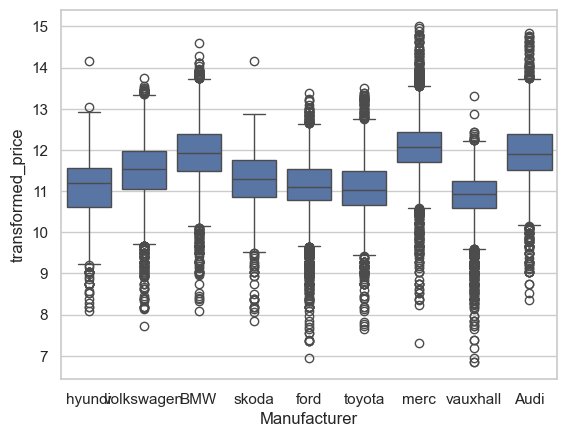

In [312]:
sns.boxplot(x='Manufacturer', y='transformed_price', data=df)

In [313]:
df['Manufacturer'].value_counts()

Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64

In [314]:
manufacturer_mean_price = df.groupby('Manufacturer')['price'].mean()

manufacturer_target_encoding = df['Manufacturer'].map(manufacturer_mean_price)
df['encoded_manufacturer'] = manufacturer_target_encoding
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol,engineSize_standardized,encoded_manufacturer
0,I10,7495,Manual,11630,Petrol,145,60.1,1.460827,hyundi,2010s,...,False,True,False,False,False,False,False,True,-0.365073,12727.809384
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.544994,volkswagen,2010s,...,False,True,False,False,False,False,False,True,-0.214306,16807.898073
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,1.896587,BMW,2010s,...,False,False,False,True,True,False,False,False,0.415494,22692.888691
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,1.307156,skoda,2010s,...,False,True,False,False,True,False,False,False,-0.640341,14284.802683
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.169399,ford,2010s,...,False,True,False,False,False,False,False,True,-0.887101,12269.779238


Target encoding preserves information about the manufacturer while converting it into a numerical format. This is important because the manufacturer has a significant impact on the target variable (car price), and I want to retain this information in a format that the model can understand.
The "manufacturer" column has 9 unique values (high cardinality), one-hot encoding could lead to a high-dimensional sparse matrix, which may not be efficient or effective for modeling. 

In [315]:
df['Manufacturer'].value_counts()

Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64

Since most manufacturers offer both a daily use and luxury collectible model, each with varying prices, mileage, and features, removing outliers would eliminate this diversity and lead to overfitting the model. Hence, outliers have been retained.

# **FINALIZING DF**

In [316]:
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,decade,...,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol,engineSize_standardized,encoded_manufacturer
0,I10,7495,Manual,11630,Petrol,145,60.1,1.460827,hyundi,2010s,...,False,True,False,False,False,False,False,True,-0.365073,12727.809384
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.544994,volkswagen,2010s,...,False,True,False,False,False,False,False,True,-0.214306,16807.898073
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,1.896587,BMW,2010s,...,False,False,False,True,True,False,False,False,0.415494,22692.888691
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,1.307156,skoda,2010s,...,False,True,False,False,True,False,False,False,-0.640341,14284.802683
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.169399,ford,2010s,...,False,True,False,False,False,False,False,True,-0.887101,12269.779238


In [317]:
df.drop(columns=['model', 'price', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'Manufacturer', 'decade', 'price_difference', 'mileage_range', 'cluster', 'category', 'tax'], inplace=True)

In [318]:
df.head()

,year,mileage_standardized,tax_standardized,mpg_standardized,transformed_price,encoded_model,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol,engineSize_standardized,encoded_manufacturer
0,5,-0.550287,0.392342,0.471332,10.529052,1,False,True,False,False,False,False,False,True,-0.365073,12727.809384
1,5,-0.665668,0.392342,0.367146,11.061052,1,False,True,False,False,False,False,False,True,-0.214306,16807.898073
2,5,-1.025863,0.392342,-0.440293,12.392276,3,False,False,False,True,True,False,False,False,0.415494,22692.888691
3,5,0.367533,0.471260,0.705750,11.241266,1,False,True,False,False,True,False,False,False,-0.640341,14284.802683
4,5,-0.183587,0.076670,-0.032232,10.619013,1,False,True,False,False,False,False,False,True,-0.887101,12269.779238


# **RANDOM FOREST**

In [319]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [320]:
X = df.drop(columns=['transformed_price'])  # Replace 'target_column' with the name of your target column
y = df['transformed_price']

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [323]:
y_pred = rf_regressor.predict(X_test)

In [324]:
rf_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', rf_mse)

Mean Squared Error: 0.03963019415611595


In [325]:
from sklearn.metrics import r2_score

# Calculate R^2 score
rf_r2 = r2_score(y_test, y_pred)
print('R-squared:', rf_r2)

R-squared: 0.9297134904335932


1. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the actual and predicted values of the target variable (price).
   - Lower values of MSE indicate better model performance, with 0 being the best possible score.
   - In this case, the MSE value of 0.0453 indicates that, on average, the squared difference between the actual and predicted 'price' values is 0.0453.

2. **R-squared (R2)**:
   - R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (price) that is explained by the independent variables (features) in the model.
   - R-squared values range from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any variance in the target variable.
   - In this case, the R-squared value of 0.9196 indicates that approximately 91.96% of the variance in the 'price' variable is explained by the independent variables included in the model.

These metrics suggest that the linear regression model performs well in predicting 'price' based on the selected features, with a low MSE and high R-squared value indicating good accuracy and explanatory power of the model.

# **XGBOOST**

In [326]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

In [327]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [328]:
y_pred = xgb_regressor.predict(X_test)

In [329]:
xgb_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", xgb_mse)

Mean Squared Error (MSE): 0.038620114626188404


In [330]:
xgb_r2 = r2_score(y_test, y_pred)
print("R-squared score:", xgb_r2)

R-squared score: 0.9315049266365907


# **LINEAR REGRESSION**

In [331]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [332]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [333]:
y_pred = linear_regressor.predict(X_test)

In [334]:
lr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", lr_mse)

lr_r2 = r2_score(y_test, y_pred)
print("R-squared score:", lr_r2)

Mean Squared Error (MSE): 0.10510264094775879
R-squared score: 0.813594206747301



Mean Squared Error (MSE): This metric measures the average squared difference between the actual and predicted values in your regression model. It provides a measure of the model's accuracy, where lower values indicate better performance. In your case, the MSE is approximately 0.105, suggesting that, on average, the squared difference between the actual and predicted values is relatively low.

R-squared (R2) score: This metric represents the proportion of the variance in the target variable that is explained by the independent variables in your regression model. It ranges from 0 to 1, where a higher value indicates a better fit of the model to the data. In your case, the R-squared score is approximately 0.813, suggesting that around 81.3% of the variance in the target variable is explained by the independent variables in your model.

Overall, these metrics indicate that your regression model performs reasonably well, with relatively low MSE and a moderately high R-squared score. However, it's essential to interpret these metrics in the context of your specific problem and compare them with other models or benchmarks to assess the model's performance accurately.

The R-squared (R2) value measures the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. When comparing the R2 values between linear regression and random forest models, it's not necessarily that the R2 of linear regression is inherently lower than that of random forest. Rather, it depends on the complexity of the relationship between the independent and dependent variables.

Here are some reasons why the R2 of a linear regression model might be lower compared to that of a random forest model:

1. **Linearity Assumption**: Linear regression assumes a linear relationship between the independent and dependent variables. If the true relationship is highly non-linear, a linear regression model may not capture it accurately, leading to a lower R2.

2. **Complexity of Relationships**: Random forest models are capable of capturing complex non-linear relationships between variables. They do this by combining multiple decision trees, each trained on different subsets of the data. This flexibility allows them to capture patterns that linear regression may miss.

3. **Feature Interactions**: Random forest models automatically handle interactions between features, while in linear regression, interactions need to be explicitly specified. If important interactions are present in the data but not accounted for in the linear regression model, it may lead to lower R2.

4. **Overfitting**: Random forest models can sometimes overfit the training data, capturing noise along with the underlying patterns. This can lead to higher R2 values on the training data but might not generalize well to new data. Linear regression, being a simpler model, is less prone to overfitting.

5. **Data Quality and Assumptions**: If the assumptions of linear regression (e.g., linearity, homoscedasticity, independence of errors) are violated or if the data contains outliers, the performance of linear regression might degrade, resulting in a lower R2.

6. **Sample Size**: The performance of linear regression models can be more sensitive to the sample size compared to random forest models. If the sample size is small, the linear regression model might not capture the underlying relationships accurately, leading to a lower R2.

# **GRADIENT BOOSTING REGRESSOR**

In [335]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

In [336]:
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [337]:
y_pred = gb_regressor.predict(X_test)

In [338]:
gb_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", gb_mse)

gb_r2 = r2_score(y_test, y_pred)
print("R-squared score:", gb_r2)

Mean Squared Error (MSE): 0.06432484734035751
R-squared score: 0.8859160522874208


# **ELASTICNET REGRESSION**

In [368]:
from sklearn.linear_model import ElasticNet
enet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

In [369]:
enet_regressor.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [370]:
y_pred = enet_regressor.predict(X_test)

In [371]:
enet_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", enet_mse)

enet_r2 = r2_score(y_test, y_pred)
print("R-squared score:", enet_r2)

Mean Squared Error (MSE): 0.1402376953521408
R-squared score: 0.7512800952448039


**Performing fine tuning** to determine the best alpha and l1_ratio values to achieve optimal performance. Here, alpha controls the strength of regularization, where smaller values mean less regularization. 

In [372]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer

enet_regressor = ElasticNet(random_state=42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Example values for alpha
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Example values for l1_ratio
}

# Define evaluation metric (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(enet_regressor, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter values
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

Best alpha: 0.001
Best l1_ratio: 0.1


In [373]:
enet_regressor = ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=42)
enet_regressor.fit(X_train, y_train)
y_pred = enet_regressor.predict(X_test)
enet_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", enet_mse)

enet_r2 = r2_score(y_test, y_pred)
print("R-squared score:", enet_r2)

Mean Squared Error (MSE): 0.10505446543828066
R-squared score: 0.813679648882519


This has increased the accuracy by 6%

# **RIDGE REGRESSION**

In [353]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()

In [354]:
ridge_regressor.fit(X_train, y_train)

Ridge()

In [355]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [356]:
rd_mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (MSE) - Ridge:", rd_mse)

rd_r2 = r2_score(y_test, y_pred_ridge)
print("R-squared score - Ridge:", rd_r2)

Mean Squared Error (MSE) - Ridge: 0.10509892119497606
R-squared score - Ridge: 0.8136008039503961


# **Understanding the Predictions**

In [374]:
metrics = {
    'Model': ['Random Forest', 'XGBoost', 'Linear Regression', 'Gradient Boost', 'ElasticNet Regression', 'Ridge Regression'],
    'MSE': [rf_mse, xgb_mse, lr_mse, gb_mse, enet_mse, rd_mse],  # Replace with your actual MSE values
    'R2': [rf_r2, xgb_r2, lr_r2, gb_r2, enet_r2, rd_r2]  # Replace with your actual R2 values
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MSE,R2
0,Random Forest,0.039630,0.929713
1,XGBoost,0.038620,0.931505
2,Linear Regression,0.105103,0.813594
3,Gradient Boost,0.064325,0.885916
4,ElasticNet Regression,0.105054,0.813680
5,Ridge Regression,0.105099,0.813601


Out of the 6 ML Models, the best model is the XGBoost Model; visualizing its metrics in detail

In [375]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgboost_regressor = xgb.XGBRegressor()
xgboost_regressor.fit(X_train, y_train)
xgb_y_pred = xgboost_regressor.predict(X_test)

mse = mean_squared_error(y_test, xgb_y_pred)
mae = mean_absolute_error(y_test, xgb_y_pred)
r2 = r2_score(y_test, xgb_y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - xgb_y_pred) / y_test)) * 100

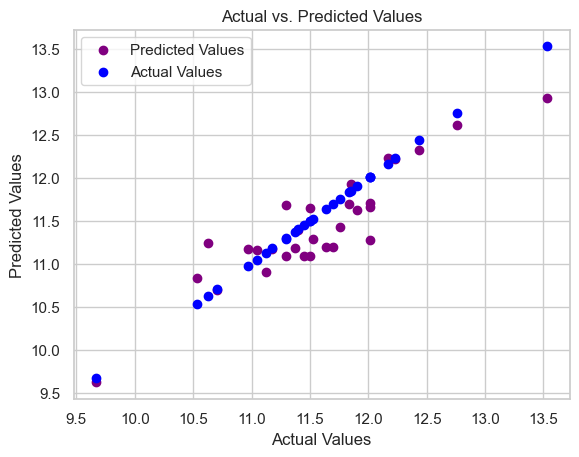

In [377]:
import random

y_test_reset_index = y_test.reset_index(drop=True)

random_indices = random.sample(range(len(y_test_reset_index)), 30)

actual_values = y_test_reset_index[random_indices]
predicted_values = y_pred[random_indices]

plt.scatter(actual_values, predicted_values, color='purple', label='Predicted Values')
plt.scatter(actual_values, actual_values, color='blue', label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

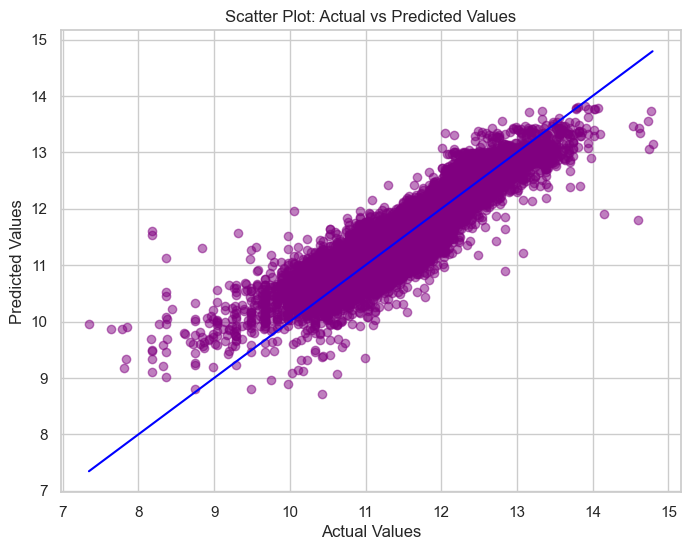

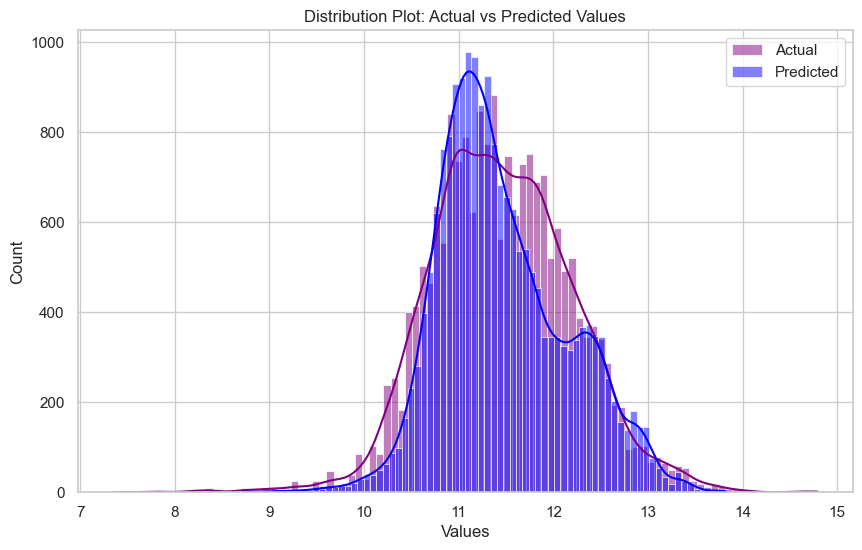

In [378]:
# Scatter Plot: Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue')  # Diagonal line
plt.title('Scatter Plot: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Distribution Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='purple', alpha=0.5, label='Actual', kde=True)
sns.histplot(y_pred, color='blue', alpha=0.5, label='Predicted', kde=True)
plt.title('Distribution Plot: Actual vs Predicted Values')
plt.xlabel('Values')
plt.legend()
plt.show()

Scatter Plot: Each point on the scatter plot represents one data point, with the x-coordinate being the actual value and the y-coordinate being the predicted value. Ideally, all points should lie on a diagonal line, indicating perfect predictions.

Distribution Plot: This helps visualize how the two distributions compare and whether there are any systematic differences or biases.

Density Plot: This allows for a direct comparison of the distributions and helps identify areas where the predictions deviate from the actual values.

# **FINE TUNING**

In [376]:
metrics = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "R-squared (R2) score": r2,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Percentage Error (MAPE)": mape
}

# Print the table
print("Metric                                 | Value")
print("---------------------------------------+------------------")
for metric, value in metrics.items():
    print(f"{metric:<38} | {value}")

Metric                                 | Value
---------------------------------------+------------------
Mean Squared Error (MSE)               | 0.038620114626188404
Mean Absolute Error (MAE)              | 0.14047448250039335
R-squared (R2) score                   | 0.9315049266365907
Root Mean Squared Error (RMSE)         | 0.19652001075256537
Mean Absolute Percentage Error (MAPE)  | 1.2453117466883041


In [379]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

xgboost_regressor = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=xgboost_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgboost_regressor = xgb.XGBRegressor(**best_params)
best_xgboost_regressor.fit(X_train, y_train)

y_pred = best_xgboost_regressor.predict(X_test)
ft_r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score on test set:", ft_r2)

ft_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) score on test set:", ft_mse)

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300}
R-squared (R2) score on test set: 0.9377291857095539
Mean Squared Error (MSE) score on test set: 0.035110641797601747


In [380]:
ft = {
    'XG BOOST': ['Before Fine Tuning', 'After Fine Tuning'],
    'MSE': [xgb_mse, ft_mse],
    'R2': [xgb_r2, ft_r2]
}

ft_df = pd.DataFrame(ft)
ft_df

,XG BOOST,MSE,R2
0,Before Fine Tuning,0.038620,0.931505
1,After Fine Tuning,0.035111,0.937729


**R-squared (R2) score:**
R-squared values range from 0 to 1, where 1 indicates a perfect fit.
A higher R-squared value suggests that the model explains a larger proportion of the variance in the dependent variable.
In this case, the R-squared score is approximately 0.937729, indicating that the model explains about 93.15% of the variance in the dependent variable, which is quite high.

**Mean Squared Error (MSE):**
The lower the MSE, the better the model's performance.
In this case, the MSE is approximately 0.035111, indicating that, on average, the squared difference between predicted and actual values is small.


**Mean Absolute Error (MAE):**
Like MSE, lower values of MAE indicate better performance.
Here, the MAE is approximately 0.1405, suggesting that, on average, the absolute difference between predicted and actual values is relatively small.

**Root Mean Squared Error (RMSE):**
Like MSE, lower values of RMSE indicate better model performance.
Here, the RMSE is approximately 0.1965, suggesting that, on average, the difference between predicted and actual values is around 0.1965 units.

**Mean Absolute Percentage Error (MAPE):**
MAPE measures the average percentage difference between predicted and actual values, relative to the actual values.
It is often expressed as a percentage.
The lower the MAPE, the better the model's performance.
In this case, the MAPE is approximately 1.245%, indicating that, on average, the model's predictions are off by around 1.245% relative to the actual values.

In this regression model for predicting car prices, the goal was to develop a predictive model that could accurately estimate the price of a car based on various input features such as mileage, year of manufacture, fuel type, transmission type, etc. The model's performance was evaluated using metrics.

XGBoost, an ensemble learning algorithm, was chosen as the primary model due to its exceptional performance in regression tasks. XGBoost's effectiveness stems from its ability to handle complex relationships within the data and its robustness to outliers and missing values. Furthermore, XGBoost's flexibility allows for fine-tuning of hyperparameters, enabling optimization of model performance.

Preprocessing steps played a crucial role in enhancing the model's performance. These steps involved data cleaning, handling missing values, encoding categorical variables, feature engineering and scaling numerical features. By preprocessing the data effectively, the model could learn more efficiently from the input features and make more accurate predictions. For instance, encoding categorical variables using bins, kmeans clustering ensures that the model can interpret non-numeric data, while scaling numerical features ensures that features with different scales contribute equally to the model's predictions.